## **PREVISÃO DO CANCER DE MAMA**

---
Este projeto tem como objetivo, escolher o melhor algoritmo com base nas metricas estatisticas, para ter em retorno a resposta se o câncer é benigno ou
maligno.

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
# MANIPULAÇÃO E PLOTAGEM DOS DADOS
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt


# PRE-PROCESSAMENTO, METRICAS DE DESEMPENHO DOS MODELOS, SEPARAÇÃO DE TREINO E TESTE, OTIMIZAÇÃO DE HIPERPARAMETROS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, minmax_scale, StandardScaler, LabelEncoder 
from sklearn.impute import SimpleImputer #
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# ALGORTIMOS DE MACHINE LEARNING UTILIZADO NO PROJETO
from sklearn.naive_bayes import GaussianNB # NAIVE BAYES
from sklearn.svm import SVC # Maquina de vetor de suporte
from sklearn.linear_model import LogisticRegression # regressão logistica
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Arvore de decisão
from sklearn.ensemble import RandomForestClassifier # Random Forest
from xgboost import XGBClassifier # xgboost
from lightgbm import LGBMClassifier # lightgbm
from catboost import CatBoostClassifier # Catboost
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost
from sklearn.neural_network import MLPClassifier #algoritmo de rede neural artificial

# EXPORTAR OS ALGORTIMOS EM ARQUIVOS PKL PARA USO POSTERIOR
import joblib

# AVISOS
import warnings #aviso
from logging import warning

In [2]:
#importação da base de dados
dados_cancer = pd.read_csv('../data/raw/dados_cancer.csv', sep = ',', encoding = 'iso-8859-1')
#exibição do dataframe
display(dados_cancer.head())
#tamanho do dataframe
dados_cancer.shape


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

(569, 33)

In [5]:
dados_cancer.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [7]:
#tipos das variaveis
dados_cancer.dtypes
#verificando a quantiade de variaveis nulas no conjunto para cada variavel.
dados_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Alvo = diagnosis (object)

previsores = colunas 1 a 31 coluna (float64)

descartaveis = Unnamed: 32 e id (float64)


#**ANALISE DAS VARAIVEIS**
quantidade de valores, valores null, distribuição gráfica

**diagnosis**

M = Maligno - 212 - 37.3%

B = Benigno - 357 - 62.7%

In [12]:
#quantidade para cada classe
dados_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
#frequencia das classes
frequencia_diagnostico = px.histogram(dados_cancer, x = 'diagnosis', nbins = 60)
frequencia_diagnostico.update_layout(title = 'Distribuição das classes')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'diagnosis=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 60,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['M', 'M', 'M', ..., 'M', 'M', 'B'], shape=(569,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Distribuição das classes'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'diagnosis'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

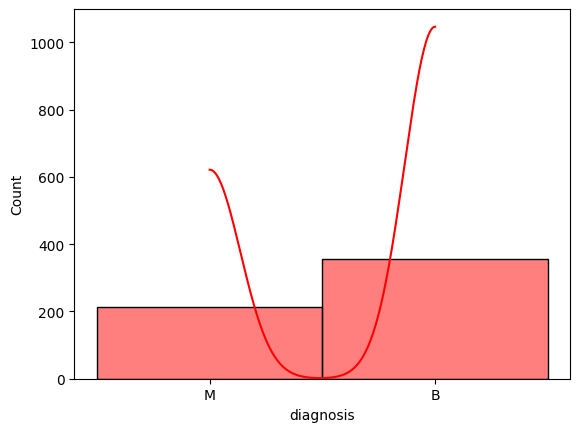

In [9]:
#curva normal para a frequencia de classes
frequencia_diagnostico_ = sns.histplot(dados_cancer, x = 'diagnosis', bins = 30, color= 'red', kde = True, stat = 'count')

In [10]:
#porcentagem de frequencia de cada classe
px.pie(dados_cancer, names= 'diagnosis')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'diagnosis=%{label}<extra></extra>',
              'labels': array(['M', 'M', 'M', ..., 'M', 'M', 'B'], shape=(569,), dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

**radius_mean**

Distribuição aproximadamente normal (Q-Q PLOT)

Apresentando um total de 14 outliers não tão dispersa entre os registros

In [11]:
#quantidade de cada valor
dados_cancer['radius_mean'].value_counts().sort_index()

radius_mean
6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: count, Length: 456, dtype: int64

<Axes: xlabel='radius_mean', ylabel='Count'>

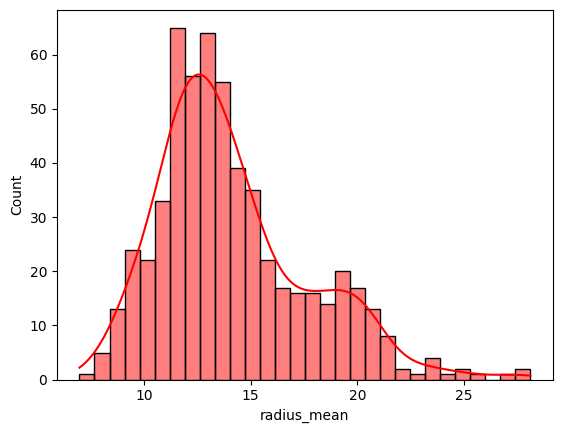

In [12]:
#frequencia dos valores
sns.histplot(dados_cancer, x = 'radius_mean', bins = 30, color = 'red', kde = True, stat = 'count' )


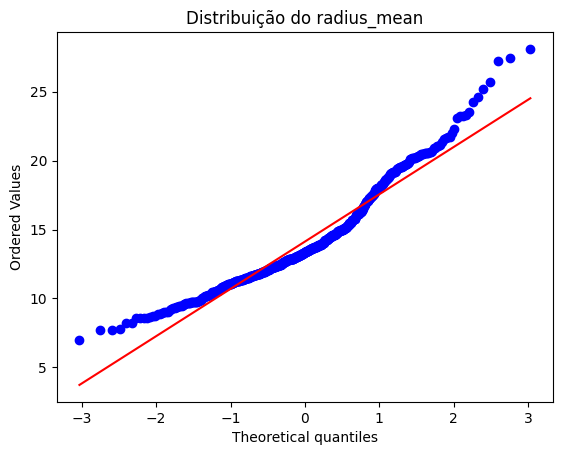

In [13]:
#distribuição dos registros.
sts.probplot(dados_cancer['radius_mean'],dist = 'norm', plot = plt)
#exibe o Q-Q PLOT e define o titlo
plt.title('Distribuição do radius_mean')
plt.show()

In [14]:
#outliers sobre os dados
px.box(dados_cancer, y = 'radius_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'radius_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('PQrXo3D9MUBSuB6F65E0QHE9CtejsD' ... 'mZmTBAmpmZmZmZNEAK16NwPQofQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'radius_mean'}}}
})

In [15]:
#um total de 14 outliers
outliers= dados_cancer[(dados_cancer['radius_mean'] > 21.75)]
outliers['radius_mean'].value_counts().sum()

np.int64(14)

In [16]:
#descrição estatistica da variavel
dados_cancer['radius_mean'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

**texture_mean**

Distribuição Aparentemente Normal (Q-Q plot)

Um total de 7 outliers com pouca dispersão


In [17]:
#frequencia dos dados
dados_cancer['texture_mean'].value_counts().sort_index()

texture_mean
9.71     1
10.38    1
10.72    1
10.82    1
10.89    1
        ..
31.12    1
32.47    1
33.56    1
33.81    1
39.28    1
Name: count, Length: 479, dtype: int64

<Axes: xlabel='texture_mean', ylabel='Count'>

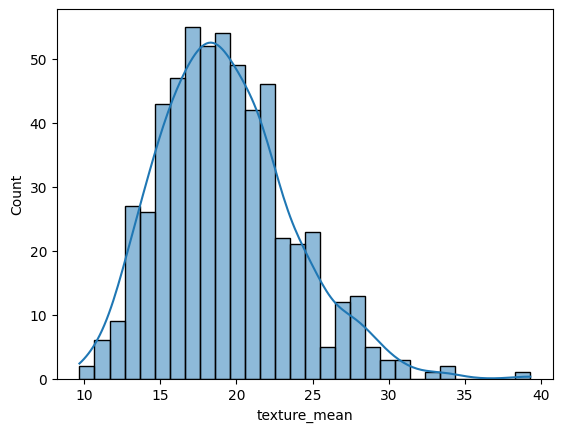

In [18]:
# analise de frequencia
sns.histplot(dados_cancer, x = 'texture_mean', bins = 30, kde = True, stat= 'count')

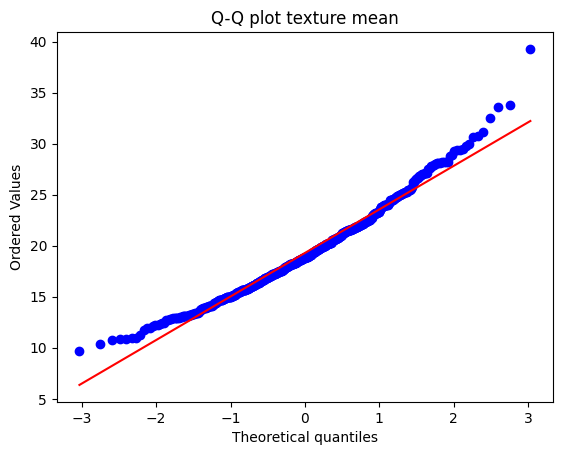

In [19]:
#Q-Q PLOT
sts.probplot(dados_cancer['texture_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot texture mean')
plt.show()

In [20]:
#outliers
px.box(dados_cancer, y = 'texture_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'texture_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('w/UoXI/CJECF61G4HsUxQAAAAAAAQD' ... 'F6FDxAFK5H4XpUPUAK16NwPYo4QA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'texture_mean'}}}
})

In [21]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['texture_mean'] >  29.97]
outliers['texture_mean'].value_counts().sum()

np.int64(7)

**perimeter_mean**

Distribuição aparetemente normal

13 outliers

In [22]:
dados_cancer['perimeter_mean'].value_counts().sort_index()

perimeter_mean
43.79     1
47.92     1
47.98     1
48.34     1
51.71     1
         ..
171.50    1
174.20    1
182.10    1
186.90    1
188.50    1
Name: count, Length: 522, dtype: int64

<Axes: xlabel='perimeter_mean', ylabel='Count'>

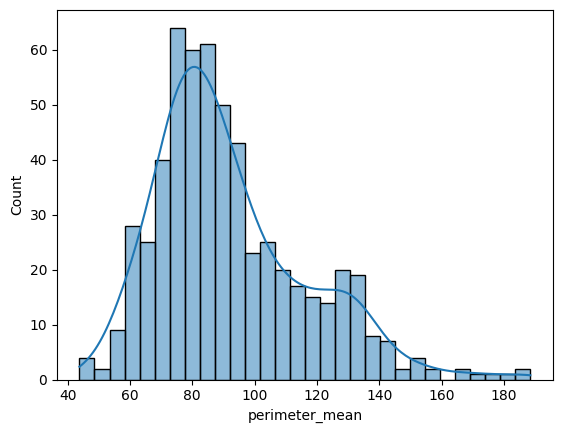

In [23]:
#
sns.histplot(dados_cancer, x= 'perimeter_mean', bins = 30 ,kde = True, stat = 'count')

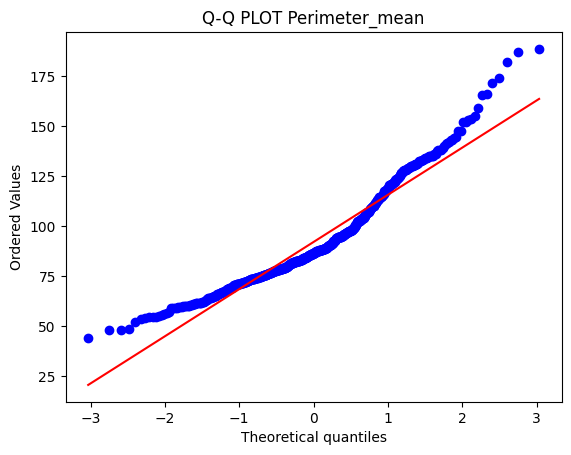

In [24]:
#qq plot
sts.probplot(dados_cancer['perimeter_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT Perimeter_mean')
plt.show()

In [25]:
#outliers
px.box(dados_cancer, y = 'perimeter_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'perimeter_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('MzMzMzOzXkDNzMzMzJxgQAAAAAAAQG' ... 'MzE1tAMzMzMzODYUD2KFyPwvVHQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'perimeter_mean'}}}
})

In [26]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['perimeter_mean'] > 147.3]
outliers['perimeter_mean'].value_counts().sum()

np.int64(13)

In [27]:
dados_cancer['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

**area_mean**

Aparentemente não segue uma distribuição normal

25 outliers com uma grande dispersão de dados na calda direita



In [28]:
#frequencias
dados_cancer['area_mean'].value_counts().sort_index()

area_mean
143.5     1
170.4     1
178.8     1
181.0     1
201.9     1
         ..
1878.0    1
2010.0    1
2250.0    1
2499.0    1
2501.0    1
Name: count, Length: 539, dtype: int64

<Axes: xlabel='area_mean', ylabel='Count'>

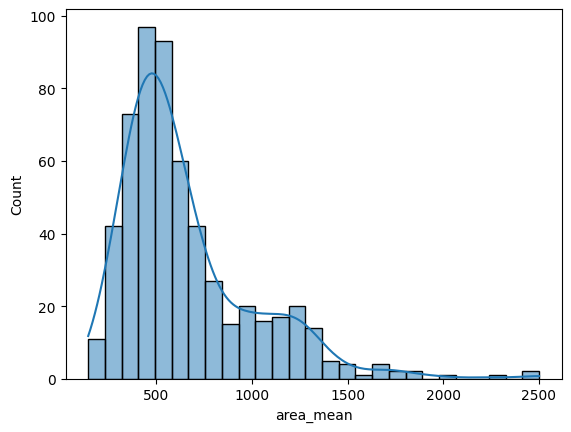

In [29]:
#frequencia dos dados e curva normal
sns.histplot(dados_cancer, x = 'area_mean', kde = True, stat = 'count')

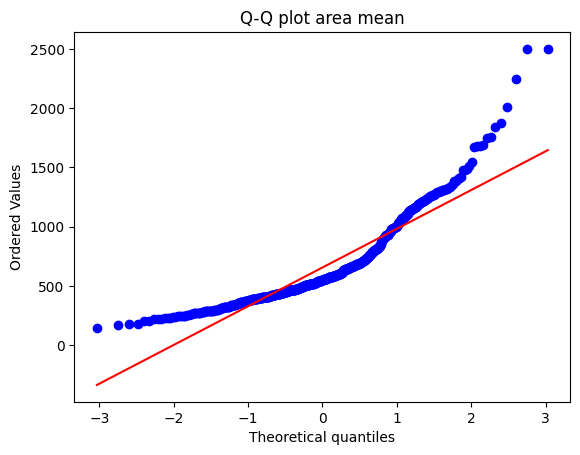

In [30]:
#Q-Q plot para variabilidade dos dados
sts.probplot(dados_cancer['area_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot area mean')
plt.show()

In [31]:
#outliers
px.box(dados_cancer, y = 'area_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'area_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAABIj0AAAAAAALiUQAAAAAAAzJ' ... 'zM0IpAAAAAAADEk0AAAAAAAKBmQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'area_mean'}}}
})

In [32]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['area_mean'] > 1326]
outliers['area_mean'].value_counts().sum()

np.int64(25)

In [33]:
#descrição estatistica dos dados
dados_cancer['area_mean'].describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

**smoothness_mean**


uma provavel distribuição normal


6 outliers no total, 5 ácima do limite superior e 1 àbaixo do limite inferior

In [34]:
dados_cancer.smoothness_mean.value_counts().sort_index()

smoothness_mean
0.05263    1
0.06251    1
0.06429    1
0.06576    1
0.06613    1
          ..
0.13710    1
0.13980    1
0.14250    1
0.14470    1
0.16340    1
Name: count, Length: 474, dtype: int64

<Axes: xlabel='smoothness_mean', ylabel='Count'>

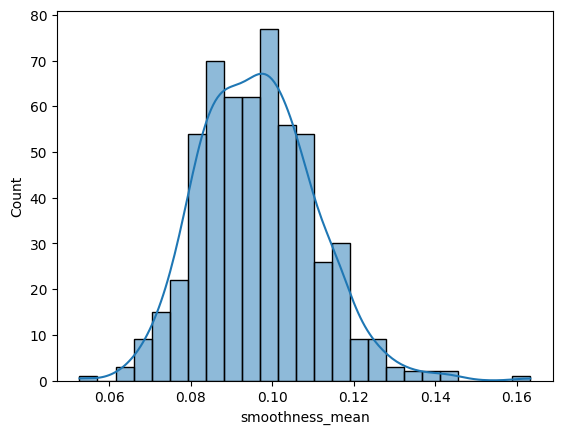

In [35]:
#
sns.histplot(dados_cancer, x = 'smoothness_mean', kde = True, stat = 'count')

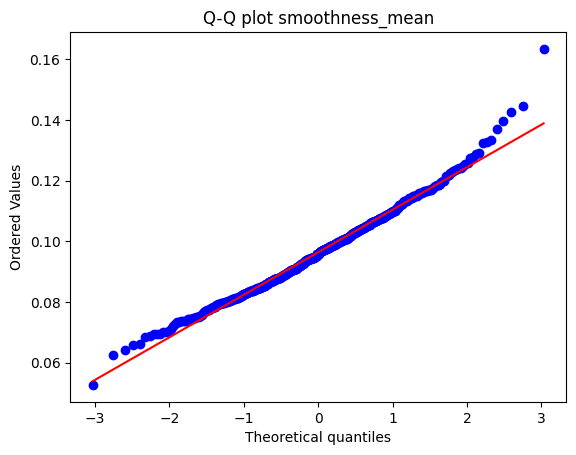

In [36]:
#distribuição dos dados
sts.probplot(dados_cancer['smoothness_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot smoothness_mean')
plt.show()


In [37]:
#analisando outliers
px.box(dados_cancer, y = 'smoothness_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'smoothness_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('rK3YX3ZPvj/9vKlIhbG1P+Y/pN++Dr' ... 'wRpbU/RwN4CyQovj+ns5PBUfKqPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'smoothness_mean'}}}
})

In [38]:
# separando para contar
outliers = dados_cancer[(dados_cancer['smoothness_mean'] > 0.1335) | (dados_cancer['smoothness_mean'] < 0.06251)]
#outliers
outliers['smoothness_mean']
#quantidade de outliers
outliers['smoothness_mean'].value_counts().sum()

np.int64(6)

**compactness_mean**

Distribuição aparentemente normal

16 outliers com um variabilidade não tão grande

In [39]:
dados_cancer['compactness_mean'].value_counts().sort_index()

compactness_mean
0.01938    1
0.02344    1
0.02650    1
0.02675    1
0.03116    1
          ..
0.28320    1
0.28390    1
0.28670    1
0.31140    1
0.34540    1
Name: count, Length: 537, dtype: int64

<Axes: xlabel='compactness_mean', ylabel='Count'>

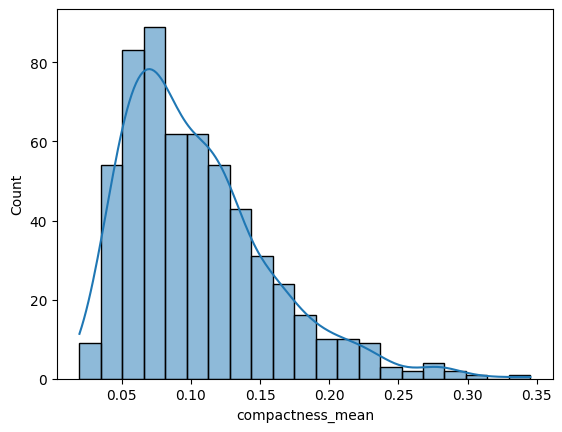

In [40]:
sns.histplot(dados_cancer, x = 'compactness_mean', kde = True, stat = 'count')

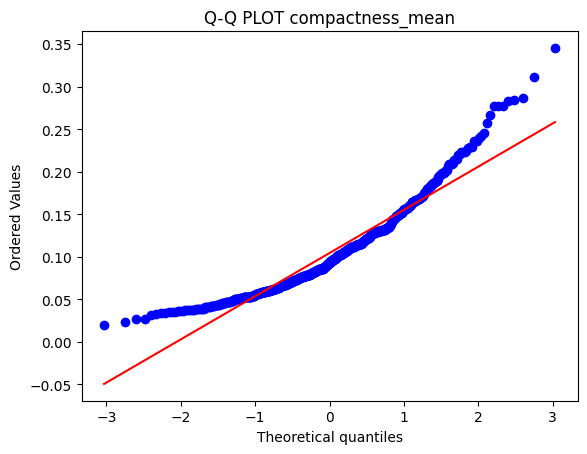

In [41]:
sts.probplot(dados_cancer['compactness_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT compactness_mean')
plt.show()

In [42]:
px.box(dados_cancer, y = 'compactness_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'compactness_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('h6dXyjLE0T/9TShEwCG0P/KwUGuad8' ... 'JVMLo/7nw/NV660T+hLedSXFWmPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'compactness_mean'}}}
})

In [43]:
outliers = dados_cancer[dados_cancer['compactness_mean'] > 0.2284]
outliers['compactness_mean']
outliers['compactness_mean'].value_counts().sum()

np.int64(16)

**concavity_mean**

Distribuição aparentemente não normal

0 valores nulos

18 outliers ácima do limte superior, grande variabilidade de valor nos outliers

In [44]:
dados_cancer['concavity_mean'].value_counts().sort_index()


concavity_mean
0.000000    13
0.000692     1
0.000974     1
0.001194     1
0.001461     1
            ..
0.363500     1
0.375400     1
0.410800     1
0.426400     1
0.426800     1
Name: count, Length: 537, dtype: int64

In [45]:
print('quantidade de registros nulos: {}'.format(dados_cancer['concavity_mean'].isnull().sum()))

quantidade de registros nulos: 0


<Axes: xlabel='concavity_mean', ylabel='Count'>

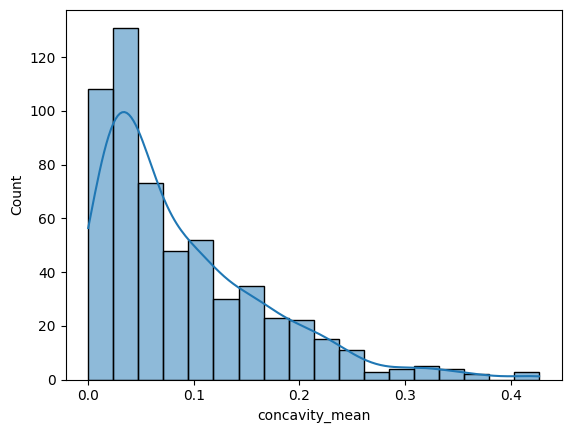

In [46]:
sns.histplot(dados_cancer,x = 'concavity_mean',kde = True, stat = 'count')

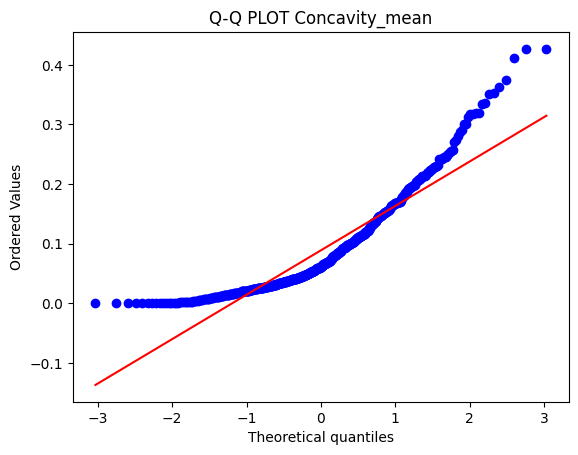

In [47]:
sts.probplot(dados_cancer['concavity_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT Concavity_mean')
plt.show()

In [48]:
#analisando os outliers
px.box(dados_cancer, y ='concavity_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concavity_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('9+RhodY00z8CvAUSFD+2P799HThnRM' ... 'C8rrc/IR/0bFZ91j8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concavity_mean'}}}
})

In [49]:
#outliers, quantidade de outliers e os registros outliars
outliers = dados_cancer[dados_cancer['concavity_mean'] > 0.281]
outliers['concavity_mean']
outliers['concavity_mean'].value_counts().sum()



np.int64(18)

In [50]:
#metricas estatisticas
dados_cancer['concavity_mean'].describe()

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

**concave points_mean**

Distribuição aparentemente não normal

total de 10 outliers com uma grande variabilidade no valor dos registros na extremidade direita

In [51]:
#frequencia dos valores
dados_cancer['concave points_mean'].value_counts()

concave points_mean
0.00000    13
0.02864     3
0.02272     2
0.14710     2
0.10430     2
           ..
0.14740     1
0.13890     1
0.09791     1
0.05302     1
0.07017     1
Name: count, Length: 542, dtype: int64

In [52]:
#verificando existencia de valores nulos
dados_cancer['concave points_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_mean', ylabel='Count'>

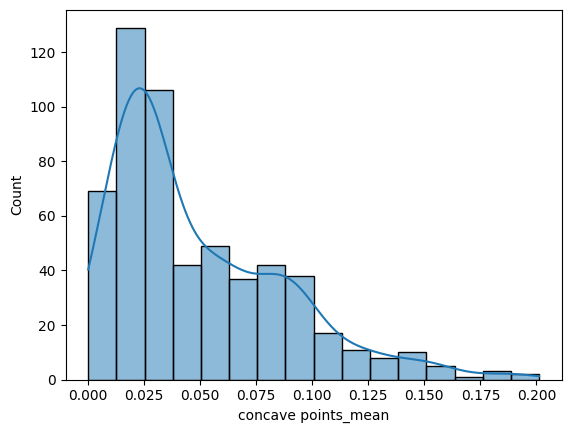

In [53]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_mean', kde = True, stat = 'count')

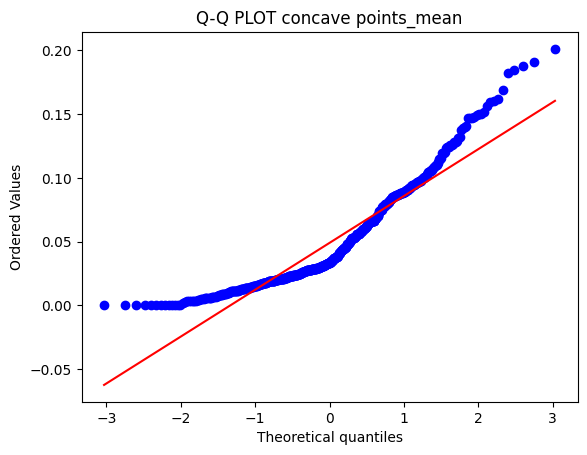

In [54]:
#Q-Q PLOT para analisar a possivel normalidade dos dados
sts.probplot(dados_cancer['concave points_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_mean')
plt.show()


In [55]:
#analise de outliers
px.box(dados_cancer, y = 'concave points_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concave points_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('wOyePCzUwj+7Cik/qfaxP3RGlPYGX8' ... 'xvJas/2/l+arx0wz8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concave points_mean'}}}
})

In [56]:
#outliers presentes e sua quantidade
outliers = dados_cancer[dados_cancer['concave points_mean'] > 0.152]
outliers['concave points_mean']
outliers['concave points_mean'].value_counts().sum()


np.int64(10)

**Symmetry_Mean**

Grande probabilidade de seguir uma distribuição normal

15 outliers, 1 no limite inferior e 14 a cima limite superior, pouca variabilidade no valor dos registros, 0 valores nulos

In [57]:
#fraquencia dos valores
dados_cancer['symmetry_mean'].value_counts()

symmetry_mean
0.1769    4
0.1893    4
0.1717    4
0.1714    4
0.1601    4
         ..
0.1917    1
0.1819    1
0.1683    1
0.2303    1
0.1586    1
Name: count, Length: 432, dtype: int64

In [58]:
#buscando valores nulos na coluna
dados_cancer['symmetry_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_mean', ylabel='Count'>

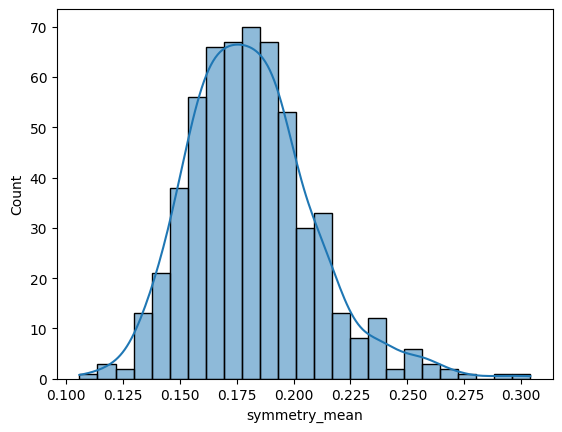

In [59]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_mean', kde = True, stat = 'count')

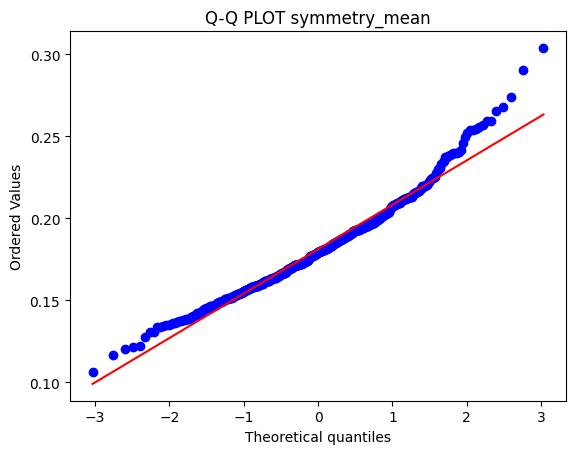

In [60]:
#Q-Q PLOT
sts.probplot(dados_cancer['symmetry_mean'], dist= 'norm', plot = plt)
plt.title('Q-Q PLOT symmetry_mean')
plt.show()

In [61]:
px.box(dados_cancer, y = 'symmetry_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'symmetry_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('2IFzRpT2zj9vgQTFjzHHP11txf6ye8' ... 'wcWsQ/H/RsVn2uzj+OBvAWSFDEPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'symmetry_mean'}}}
})

In [62]:
#outliers e quantidade
outliers = dados_cancer[(dados_cancer['symmetry_mean'] > 0.2459) | (dados_cancer['symmetry_mean'] < 0.1167)]
outliers['symmetry_mean']
outliers['symmetry_mean'].value_counts().sum()


np.int64(15)

**fractal_dimension_mean**

Distribuição aparentemente normal

10 outliers para o limite superior pouca variabilidade no valor dos registros

In [63]:
#frequencia dos registros
dados_cancer.fractal_dimension_mean.value_counts().sort_values()

fractal_dimension_mean
0.07356    1
0.05648    1
0.07016    1
0.09744    1
0.06149    1
          ..
0.06113    3
0.05907    3
0.05667    3
0.05913    3
0.06782    3
Name: count, Length: 499, dtype: int64

In [64]:
#valores nulos
dados_cancer.fractal_dimension_mean.isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

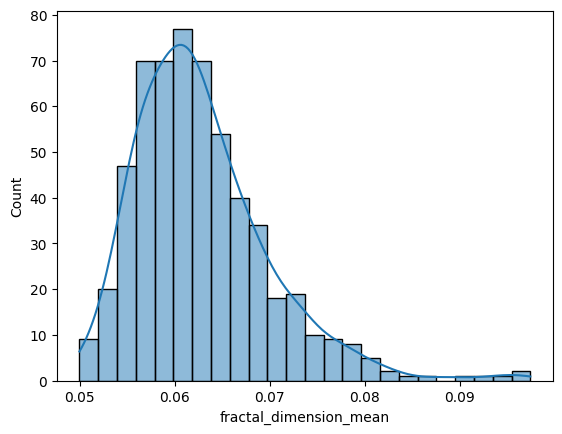

In [65]:
#histograma com curva normal
sns.histplot(dados_cancer, x='fractal_dimension_mean', kde = True, stat = 'count')

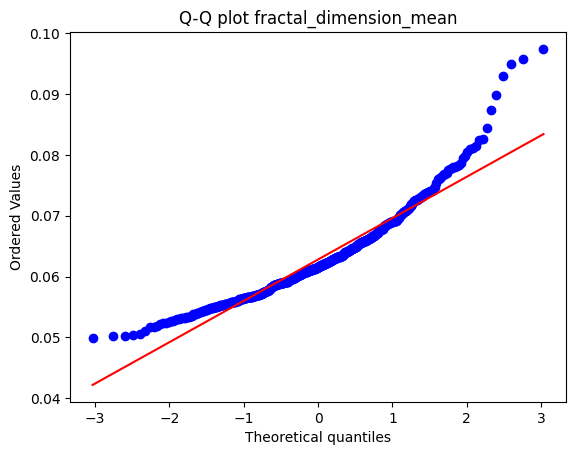

In [66]:
#Q-Q plot para analisar a distribuição do dados com relação a reta
sts.probplot(dados_cancer.fractal_dimension_mean, dist = 'norm', plot = plt)
plt.title('Q-Q plot fractal_dimension_mean')
plt.show()

In [67]:
#outliers
px.box(dados_cancer,  y = 'fractal_dimension_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'fractal_dimension_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('vD/eq1YmtD/AIVSp2QOtP4KQLGACt6' ... 'Hy6qw/oMN8eQH2sT8ArmTHRiCuPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'fractal_dimension_mean'}}}
})

In [68]:
#outliers e soma de outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_mean'] > 0.07871]
outliers.fractal_dimension_mean
outliers.fractal_dimension_mean.value_counts().sum()

np.int64(15)

**radius mean**

Distribuição aparentemente normal

14 outliers no limite superior, pouca variabilidade nos valores dos registros, 0 valores nulos

In [69]:
#frequencia dos registos
dados_cancer['radius_mean'].value_counts().sort_index()

radius_mean
6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: count, Length: 456, dtype: int64

In [70]:
#valores missing
dados_cancer['radius_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='radius_mean', ylabel='Count'>

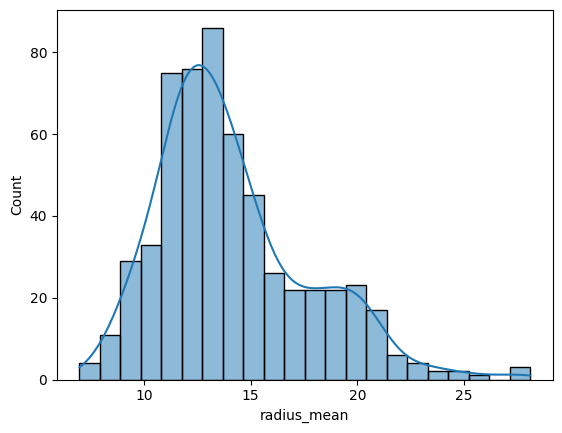

In [71]:
sns.histplot(dados_cancer, x = 'radius_mean', kde = True, stat = 'count')

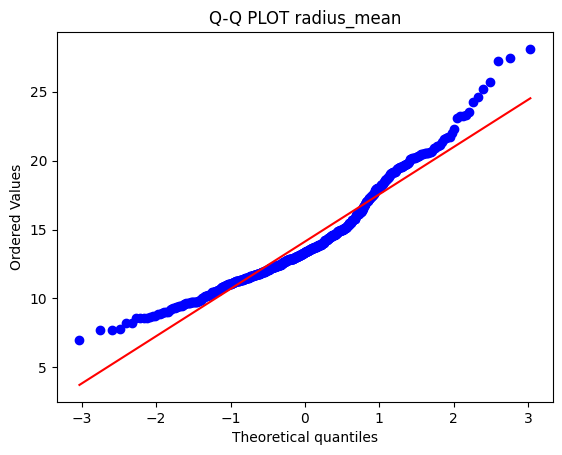

In [72]:
sts.probplot(dados_cancer['radius_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT radius_mean')
plt.show()

In [73]:
px.box(dados_cancer, y = 'radius_mean')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'radius_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('PQrXo3D9MUBSuB6F65E0QHE9CtejsD' ... 'mZmTBAmpmZmZmZNEAK16NwPQofQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'radius_mean'}}}
})

In [74]:
outliers = dados_cancer[dados_cancer['radius_mean'] > 21.75]
outliers.radius_mean
outliers.radius_mean.value_counts().sum()

np.int64(14)

**texture_se**

Distribuição aproximadamento normal

20 outliers no limite superior, variabilidade do valor nos registros não tão alta, 0 valores missing

In [75]:
#frequencia dos valores
dados_cancer['texture_se'].value_counts().sort_index()

texture_se
0.3602    1
0.3621    1
0.3628    1
0.3871    1
0.3981    1
         ..
3.1200    1
3.5680    1
3.6470    1
3.8960    1
4.8850    1
Name: count, Length: 519, dtype: int64

In [76]:
#valores missing
dados_cancer.texture_se.isnull().sum()

np.int64(0)

<Axes: xlabel='texture_se', ylabel='Count'>

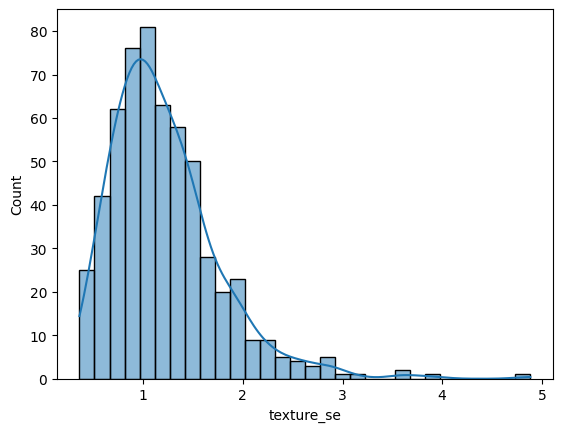

In [77]:
sns.histplot(dados_cancer, x = 'texture_se', kde = True, stat = 'count')

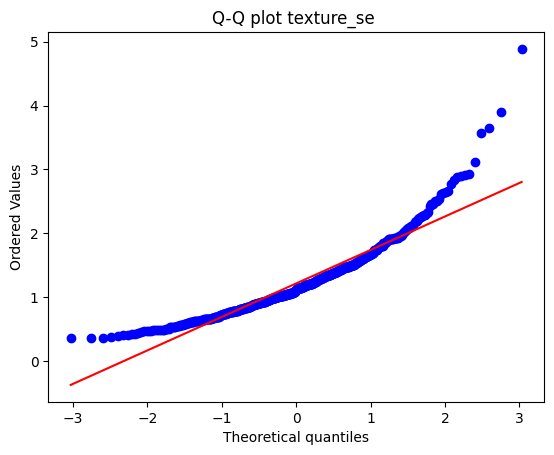

In [78]:
sts.probplot(dados_cancer['texture_se'], dist = 'norm', plot = plt)
plt.title('Q-Q plot texture_se ')
plt.show()

In [79]:
px.box(dados_cancer, y = 'texture_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'texture_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('nDOitDf47D/OGVHaG3znP+cdp+hILu' ... 'MzM/E/hetRuB6F+T8MAiuHFtn2Pw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'texture_se'}}}
})

In [80]:
outliers = dados_cancer[dados_cancer['texture_se'] > 2.426]
outliers.texture_se
outliers.texture_se.value_counts().sum()

np.int64(20)

**parimeter_se**
Aparentemente não segue uma distribuição normal

38 outliers acima do limite superior, com uma grande variabilidade no valor do registros, uma grande cauda a direita

In [81]:
#
dados_cancer['perimeter_se'].value_counts()

perimeter_se
1.778    4
1.143    2
2.041    2
2.410    2
2.097    2
        ..
7.673    1
5.203    1
3.425    1
5.772    1
3.445    1
Name: count, Length: 533, dtype: int64

In [82]:
#checando valroes nulos
dados_cancer['perimeter_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='perimeter_se', ylabel='Count'>

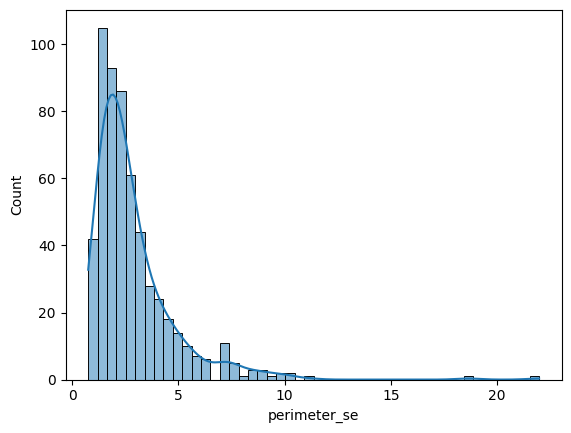

In [83]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'perimeter_se', kde = True, stat = 'count')


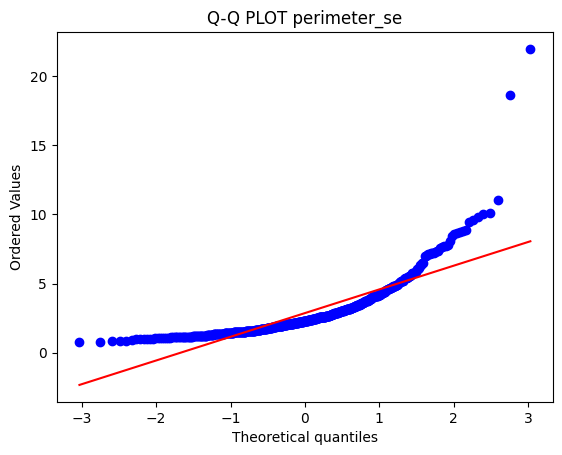

In [84]:
#QQ plot
sts.probplot(dados_cancer['perimeter_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT perimeter_se')
plt.show()

In [85]:
px.box(dados_cancer, y = 'perimeter_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'perimeter_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('IbByaJEtIUDJdr6fGi8LQNejcD0KVx' ... 'ZmZgtASgwCK4cWF0D8qfHSTWIEQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'perimeter_se'}}}
})

In [86]:
outliers = dados_cancer[dados_cancer['perimeter_se'] > 5.865]
outliers.perimeter_se
outliers.perimeter_se.value_counts().sum()

np.int64(38)

In [87]:
dados_cancer.perimeter_se.describe()

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter_se, dtype: float64

**area_se**

Aparentemente segue uma distribuição não normal

contendo 64 outliers no limite superior, uma grande variabilidade no valor do limite superior até o ultimo outlier, 0 valores nulos.

In [88]:
#frequencia
dados_cancer['area_se'].value_counts().sort_values()

area_se
17.47    1
20.04    1
12.58    1
12.30    1
32.52    1
        ..
17.85    2
16.64    3
17.67    3
18.54    3
16.97    3
Name: count, Length: 528, dtype: int64

In [89]:
#checando valores nulos
dados_cancer['area_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='area_se', ylabel='Count'>

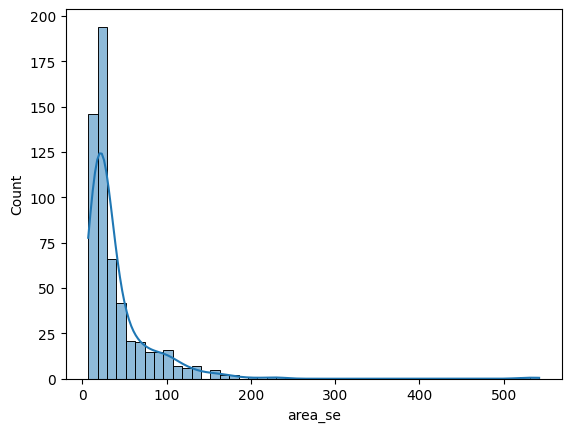

In [90]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'area_se', kde = True, stat = 'count')

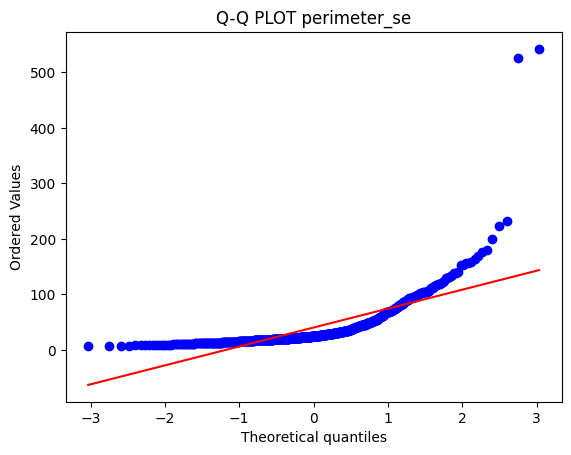

In [91]:
#QQ plot
sts.probplot(dados_cancer['area_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT perimeter_se')
plt.show()

In [92]:
px.box(dados_cancer, y = 'area_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'area_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('zczMzMwsY0CF61G4HoVSQFK4HoXrgV' ... 'ZmRkhArkfhehSOVUBmZmZmZiYzQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'area_se'}}}
})

In [93]:
outliers = dados_cancer[dados_cancer['area_se'] > 86.22]
outliers.area_se
outliers.area_se.value_counts().sum()

np.int64(64)

**smoothness_se**

Aparentemente segue uma distribuição normal

com 29 outliers no limite superior, uma baixa variabilidade nos valores do registros e 0 valores nulos.

In [94]:
#frequencia
dados_cancer.smoothness_se.value_counts().sort_values()

smoothness_se
0.008268    1
0.005731    1
0.008805    1
0.004314    1
0.007510    1
           ..
0.010520    2
0.007514    2
0.006494    2
0.006399    2
0.005910    2
Name: count, Length: 547, dtype: int64

In [95]:
#checando valores nulos
dados_cancer['smoothness_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='smoothness_se', ylabel='Count'>

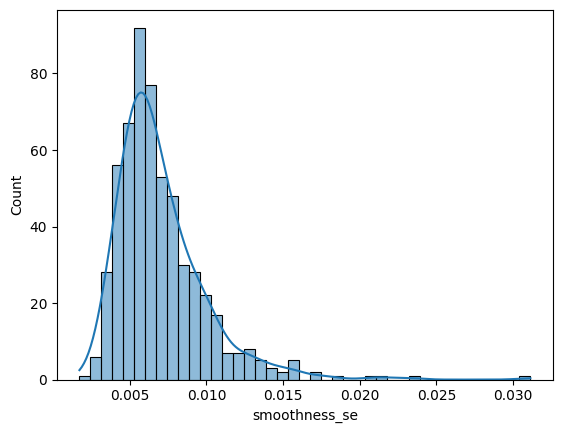

In [96]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'smoothness_se', kde = True, stat = 'count')

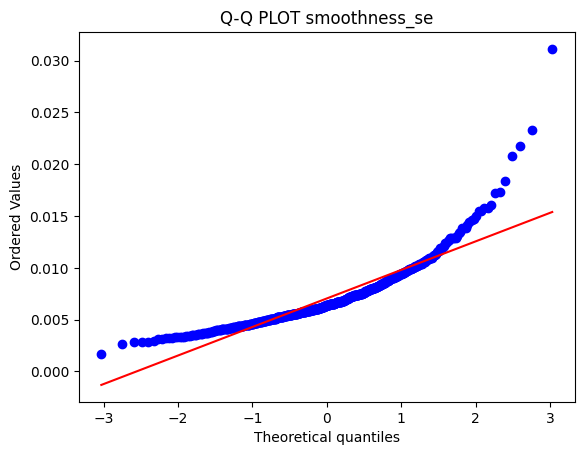

In [97]:
#QQ plot
sts.probplot(dados_cancer['smoothness_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT smoothness_se')
plt.show()

In [98]:
px.box(dados_cancer, y = 'smoothness_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'smoothness_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('zjeie9Y1ej/XEvJBz2Z1P40o7Q2+MH' ... '++LXg/YK5FC9C2ej9/TkF+NnJ9Pw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'smoothness_se'}}}
})

In [99]:
outliers = dados_cancer[dados_cancer['smoothness_se'] > 0.01262]
outliers.smoothness_se
outliers.smoothness_se.value_counts().sum()

np.int64(29)

In [100]:
dados_cancer['smoothness_se'].describe()

count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness_se, dtype: float64

**compactness_se**

Distribuição não aparente seguir normalidade, com uma cauda muito grande para a direita

28 outliers para o limite superior, com uma grande variabilidade entre o valor dos registros.

In [101]:
#frequencia dos valores
dados_cancer['compactness_se'].value_counts().sort_values()

compactness_se
0.049040    1
0.021720    1
0.020990    1
0.007247    1
0.030840    1
           ..
0.013710    2
0.016460    2
0.011040    3
0.023100    3
0.018120    3
Name: count, Length: 541, dtype: int64

In [102]:
#quantidade de valores nulos
dados_cancer['compactness_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='compactness_se', ylabel='Count'>

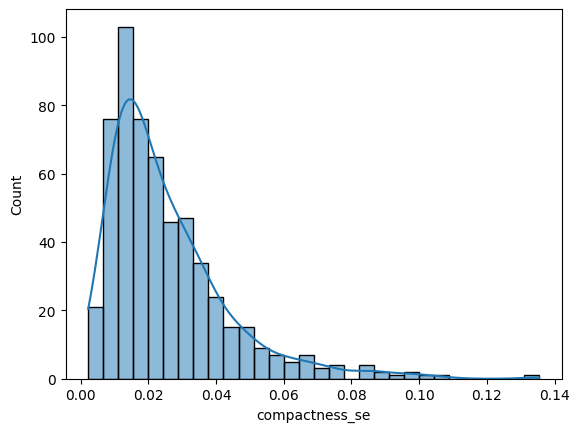

In [103]:
#histograma com curva de normalidade
sns.histplot(dados_cancer,x = 'compactness_se', kde = True,bins = 30,stat = 'count')

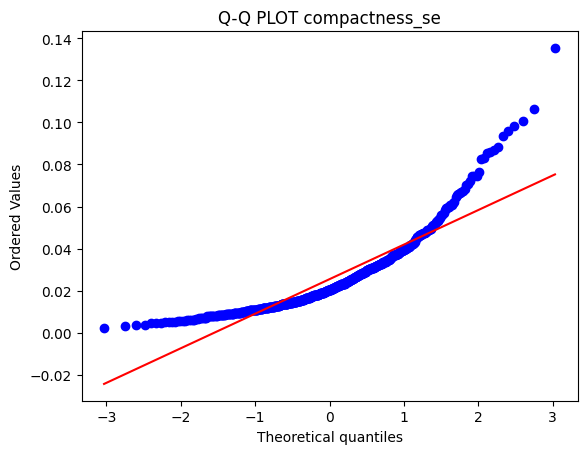

In [104]:
#Q-Q plot
sts.probplot(dados_cancer['compactness_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT compactness_se')
plt.show()

In [105]:
#outliers e quartis
px.box(dados_cancer, y = 'compactness_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'compactness_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('JEVkWMUbqT8Le9rhr8mKP8JpwYu+gq' ... 'tLGqM/ZeQs7GmHrz+D+pY5XRZzPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'compactness_se'}}}
})

In [106]:
outliers = dados_cancer[dados_cancer['compactness_se']> 0.06063]
outliers.compactness_se
outliers.compactness_se.value_counts().sum()

np.int64(28)

**concavity_se**
Distribuição aparentemente normal, cauda grade a direita

22 outliers para o limite superior, com uma variabilidade baixa na dispersão dos dados

In [107]:
#frequencia
dados_cancer['concavity_se'].value_counts().sort_index()

concavity_se
0.000000    13
0.000692     1
0.000793     1
0.000974     1
0.001128     1
            ..
0.143500     1
0.143800     1
0.153500     1
0.303800     1
0.396000     1
Name: count, Length: 533, dtype: int64

In [108]:
#valores nulos
dados_cancer['concavity_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='concavity_se', ylabel='Count'>

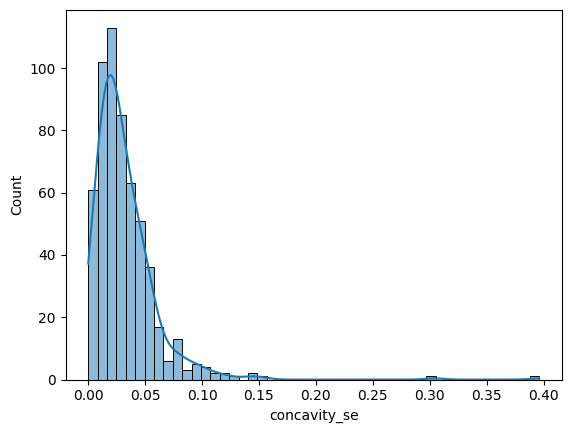

In [109]:
#hsitograma com curva normal
sns.histplot(dados_cancer, x = 'concavity_se', kde = True, stat = 'count')

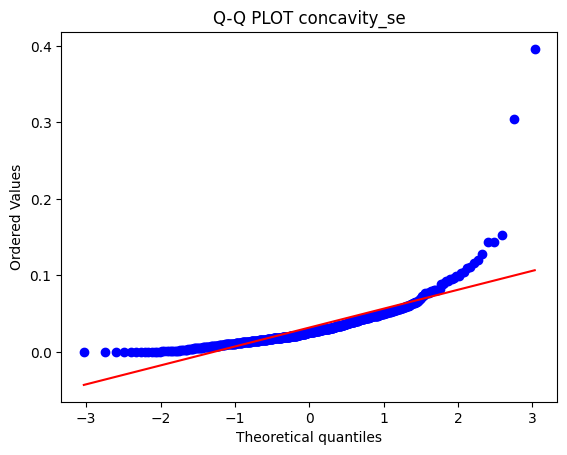

In [110]:
#QQ PLOT
sts.probplot(dados_cancer['concavity_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concavity_se')
plt.show()

In [111]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concavity_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concavity_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('GM+goX+Cqz/OiNLe4AuTP63AkNWtnq' ... 'K0N6g/Y9F0djI4sj8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concavity_se'}}}
})

In [112]:
#outliers
outliers = dados_cancer[dados_cancer['concavity_se'] > 0.08232]
outliers.concavity_se
outliers.concavity_se.value_counts().sum()

np.int64(22)

**concave points_se**

Distribuição aparentemente normal, unicaldal a direita

18 outliers para o limite superior e pouca variabilidade na dispersão dos dados

In [113]:
#frequencia
dados_cancer['concave points_se'].value_counts().sort_index()

concave points_se
0.000000    13
0.001852     1
0.002386     1
0.002404     1
0.002924     1
            ..
0.034410     1
0.034870     1
0.039270     1
0.040900     1
0.052790     1
Name: count, Length: 507, dtype: int64

In [114]:
#valores nulos
dados_cancer['concave points_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_se', ylabel='Count'>

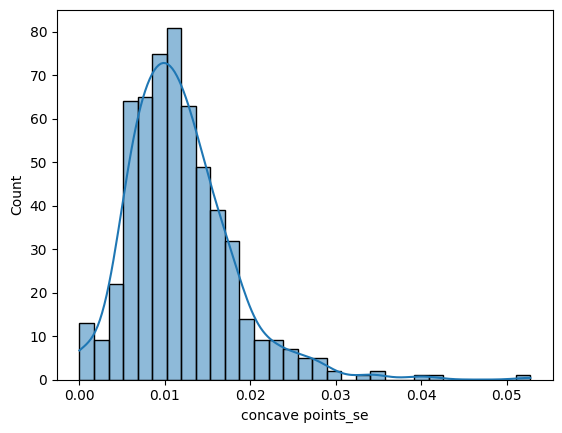

In [115]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_se', kde = True, stat = 'count')

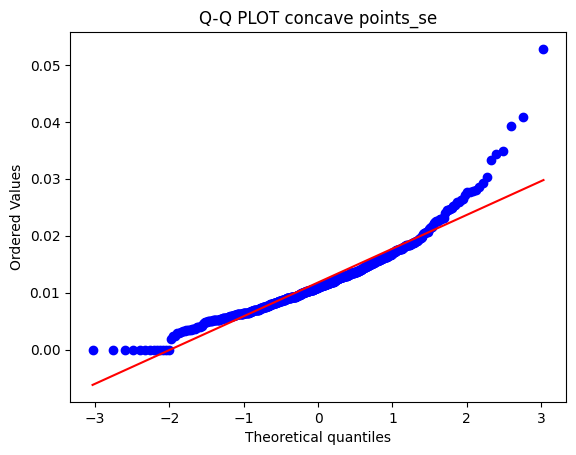

In [116]:
#QQ PLOT
sts.probplot(dados_cancer['concave points_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [117]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concave points_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concave points_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('cTjzqzlAkD9TliGOdXGLPzSFzmvsEp' ... 'Yq448/Q8U4fxMKkT8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concave points_se'}}}
})

In [118]:
#outliers
outliers = dados_cancer[dados_cancer['concave points_se'] > 0.02536]
outliers['concave points_se']
outliers['concave points_se'].value_counts().sum()

np.int64(18)

**symmetry_se**

Acredito que não siga uma distribuição normal, 0 valores nulos

27 outliers para o limite superior, variabilidade não muito alta para a dispersão dos dados

In [119]:
#frequencia
dados_cancer['symmetry_se'].value_counts().sort_index()

symmetry_se
0.007882    1
0.009539    1
0.009947    1
0.010130    1
0.010290    1
           ..
0.055430    1
0.056280    1
0.059630    1
0.061460    1
0.078950    1
Name: count, Length: 498, dtype: int64

In [120]:
#valores nulos
dados_cancer['symmetry_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_se', ylabel='Count'>

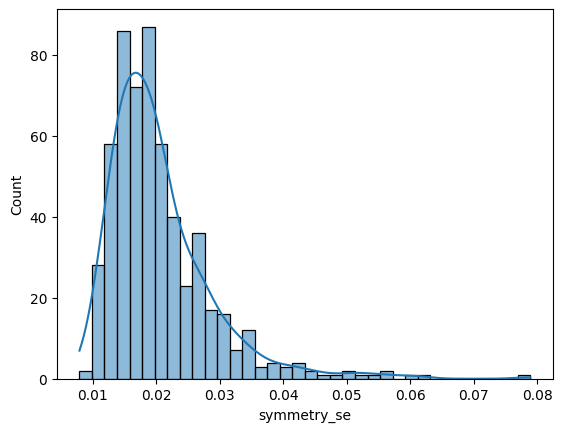

In [121]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_se', kde = True, stat = 'count')

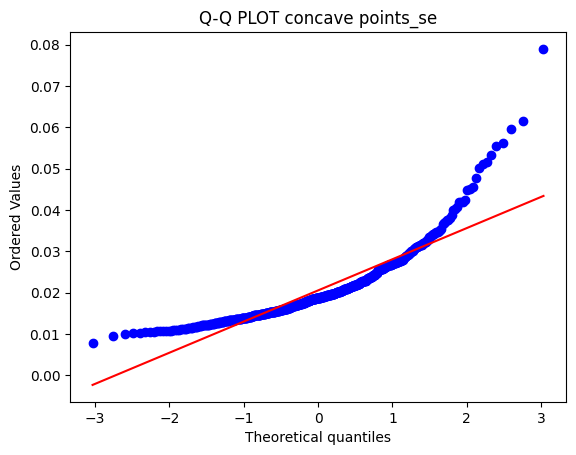

In [122]:
#QQ PLOT
sts.probplot(dados_cancer['symmetry_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [123]:
#box plot par aos outliers
px.box(dados_cancer, y = 'symmetry_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'symmetry_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AHSYLy/Anj8YeO49XHKMPwrXo3A9Cp' ... 'cd/oo/lQ7W/znMlz+eJF0z+WabPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'symmetry_se'}}}
})

In [124]:
#outliers
outliers = dados_cancer[dados_cancer['symmetry_se'] > 0.03546]
outliers['symmetry_se']
outliers['symmetry_se'].value_counts().sum()

np.int64(27)

**fractal_dimension_se**

Distribuição aparentemente normal, 0 valores nulos

28 outliers para o limite superior, pouca variabilidade na dispersão do dados

In [125]:
#frequencia de valores
dados_cancer['fractal_dimension_se'].value_counts().sort_values()

fractal_dimension_se
0.006193    1
0.001343    1
0.003599    1
0.002583    1
0.002606    1
           ..
0.002701    2
0.004005    2
0.003563    2
0.003224    2
0.005667    2
Name: count, Length: 545, dtype: int64

In [126]:
#valores nulos
dados_cancer['fractal_dimension_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

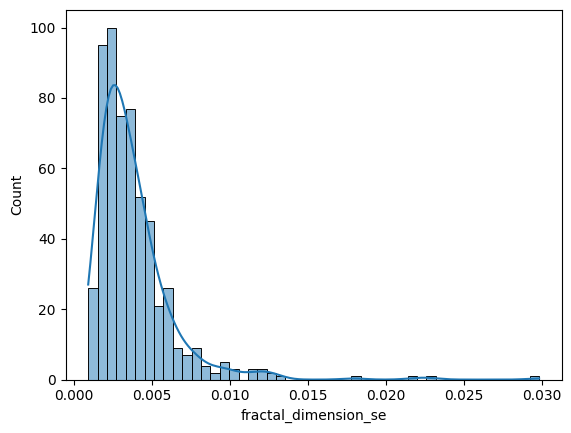

In [127]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'fractal_dimension_se', kde = True, stat = 'count')

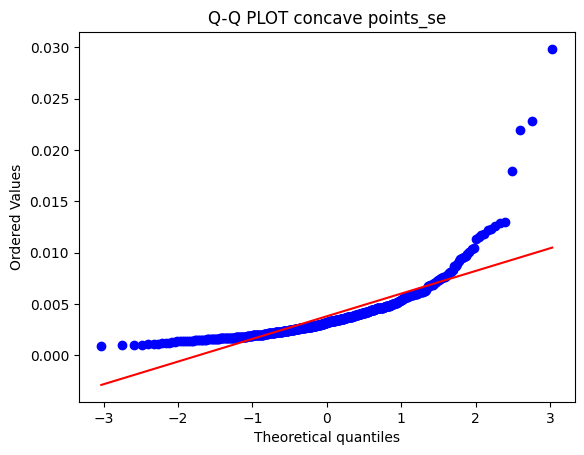

In [128]:
#QQ PLOT
sts.probplot(dados_cancer['fractal_dimension_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [129]:
#box plot par aos outliers
px.box(dados_cancer, y = 'fractal_dimension_se')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'fractal_dimension_se=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('exFtx9RdeT8vwakPJO9sP4oGKXgKuX' ... 'Yd4m8/hbacS3FVeT8uOIO/X8xmPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'fractal_dimension_se'}}}
})

In [130]:
#outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_se'] > 0.008015]
outliers['fractal_dimension_se']
outliers['fractal_dimension_se'].value_counts().sum()

np.int64(28)

**radius_worst**

Distribuição aparentemente normal, 0 valores nulos

28 outliers para o limite superior, pouca variabilidade na dispersão dos dados

In [131]:
#frequencia de valores
dados_cancer['radius_worst'].value_counts().sort_values()

radius_worst
17.52    1
15.61    1
12.45    1
17.11    1
17.32    1
        ..
14.91    3
11.92    3
13.50    4
13.34    4
12.36    5
Name: count, Length: 457, dtype: int64

In [132]:
#valores nulos
dados_cancer['radius_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='radius_worst', ylabel='Count'>

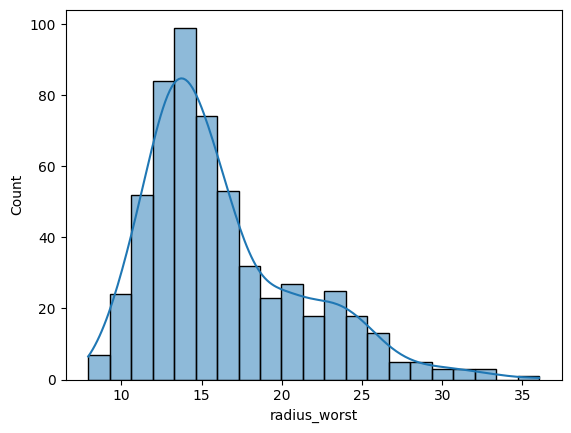

In [133]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'radius_worst', kde = True, stat = 'count')

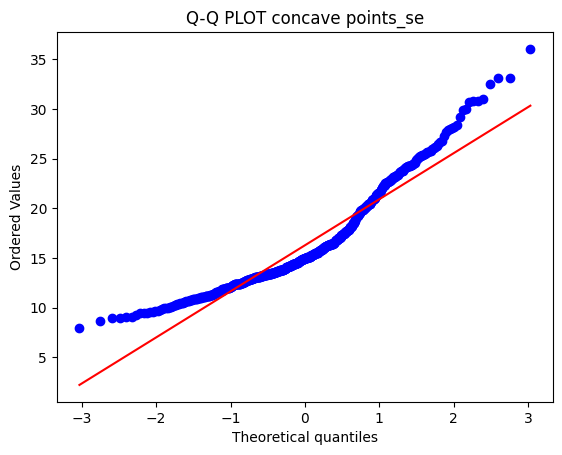

In [134]:
#QQ PLOT
sts.probplot(dados_cancer['radius_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [135]:
#box plot par aos outliers
px.box(dados_cancer, y = 'radius_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'radius_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('4XoUrkdhOUA9CtejcP04QFK4HoXrkT' ... 'fh+jJAPQrXo3C9OUC28/3UeOkiQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'radius_worst'}}}
})

In [136]:
#outliers
outliers = dados_cancer[dados_cancer['radius_worst'] > 27.32]
outliers['radius_worst']
outliers['radius_worst'].value_counts().sum()

np.int64(17)

**texture_worst**
Distribuição aparentemente normal, 0 valores nulos

5 outliers para o limite superior, uma variabilidade muito baixa para a dispersão dos dados.

In [137]:
dados_cancer['texture_worst'].value_counts().sort_values()

texture_worst
36.71    1
28.26    1
36.00    1
35.74    1
34.91    1
        ..
22.75    2
24.90    2
25.84    2
17.70    3
27.26    3
Name: count, Length: 511, dtype: int64

In [138]:
#valores nulos
dados_cancer['texture_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='texture_worst', ylabel='Count'>

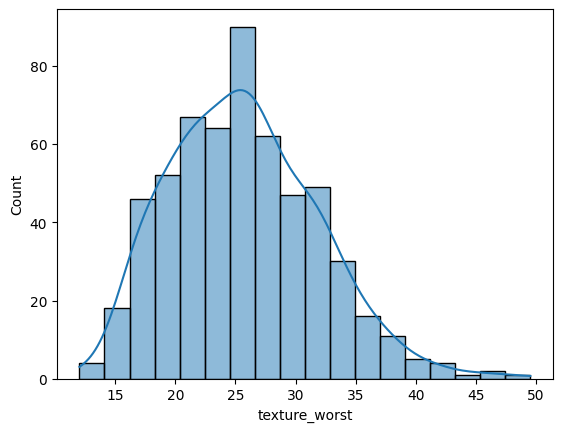

In [139]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'texture_worst', kde = True, stat = 'count')

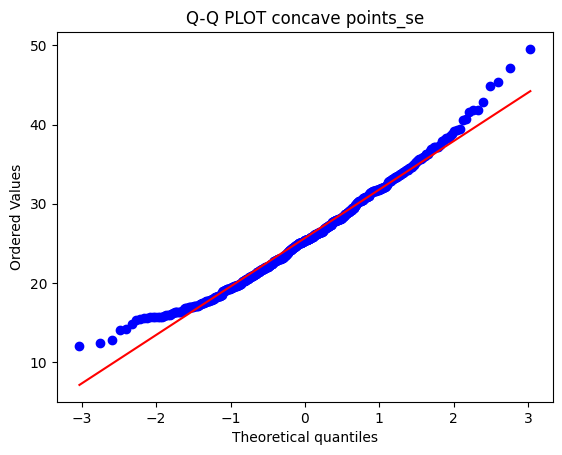

In [140]:
#QQ PLOT
sts.probplot(dados_cancer['texture_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [141]:
#box plot par aos outliers
px.box(dados_cancer, y = 'texture_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'texture_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('FK5H4XpUMUApXI/C9Wg3QEjhehSuhz' ... 'hcD0FA9ihcj8K1Q0AfhetRuF4+QA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'texture_worst'}}}
})

In [142]:
#outliers
outliers = dados_cancer[dados_cancer['texture_worst'] > 41.85]
outliers['texture_worst']
outliers['texture_worst'].value_counts().sum()

np.int64(5)

**perimeter_worst**

Distribuição aproximadamente normal, 0 valores nulos

15 outliers para o limite superior, uma variabilidade muito baixo na dispersão dos registros

In [143]:
#frequencia
dados_cancer['perimeter_worst'].value_counts().sort_values()

perimeter_worst
78.78     1
122.10    1
88.83     1
94.94     1
95.78     1
         ..
112.00    2
184.60    2
101.70    3
105.90    3
117.70    3
Name: count, Length: 514, dtype: int64

In [144]:
#valores nulos
dados_cancer['perimeter_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='perimeter_worst', ylabel='Count'>

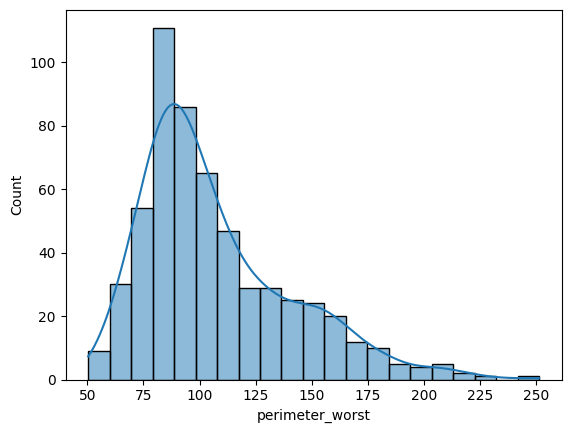

In [145]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'perimeter_worst', kde = True, stat = 'count')

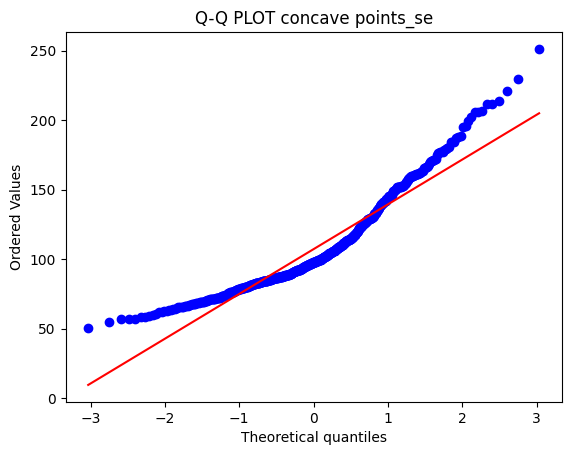

In [146]:
#QQ PLOT
sts.probplot(dados_cancer['perimeter_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [147]:
#box plot par aos outliers
px.box(dados_cancer, y = 'perimeter_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'perimeter_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('MzMzMzMTZ0CamZmZmdljQAAAAAAAEG' ... 'zMrF9AMzMzMzMTZ0AUrkfhepRNQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'perimeter_worst'}}}
})

In [148]:
#outliers
outliers = dados_cancer[dados_cancer['perimeter_worst'] > 186.8]
outliers['perimeter_worst']
outliers['perimeter_worst'].value_counts().sum()

np.int64(15)

**area_worst**

Distribuição aproximadamente não normal, 0 valores nulos, uma calda grande a direita

34 outliers para o limite superior, uma variabilidade na dispersão dos registros e no valor

In [149]:
#frequencia
dados_cancer['area_worst'].value_counts().sort_values()

area_worst
1321.0    1
457.8     1
629.6     1
688.6     1
729.8     1
         ..
439.6     2
1437.0    2
830.5     2
733.5     2
698.8     2
Name: count, Length: 544, dtype: int64

In [150]:
#valores nulos
dados_cancer['area_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='area_worst', ylabel='Count'>

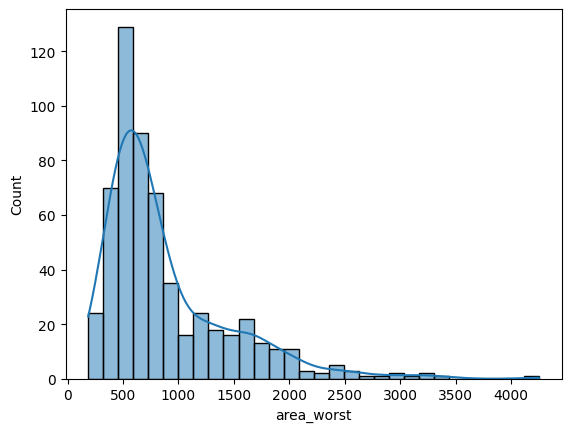

In [151]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'area_worst', kde = True, stat = 'count')

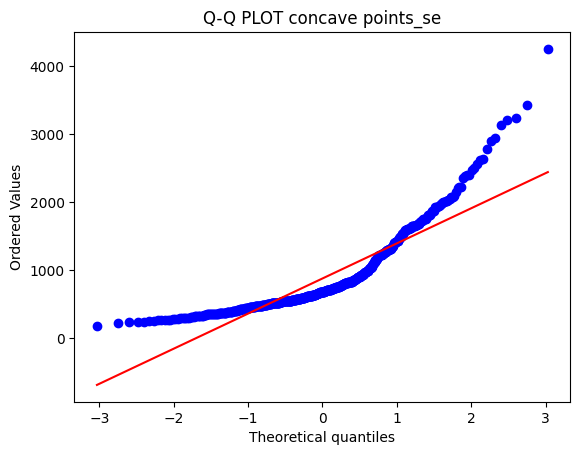

In [152]:
#QQ PLOT
sts.probplot(dados_cancer['area_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [153]:
#box plot par aos outliers
px.box(dados_cancer, y = 'area_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'area_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAACMn0AAAAAAAJCeQAAAAAAAtJ' ... 'AAkJFAAAAAAAB0nECamZmZmclwQA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'area_worst'}}}
})

In [154]:
#outliers
outliers = dados_cancer[dados_cancer['area_worst'] > 1938]
outliers['area_worst']
outliers['area_worst'].value_counts().sum()

np.int64(34)

**smoothness_worst**

Distribuição aparentemente normal, os dados estão muito proximo da reta no Q-Q PLOT, 0 valores nulos

6 outliers, 5 para o limite superior e 1 para o limite inferior, a variabilidade dos dados está muito baixo, tanto para a dispersão quanto para os valores dos registro.

In [155]:
#frequencia
dados_cancer['smoothness_worst'].value_counts().sort_values()

smoothness_worst
0.08996    1
0.16500    1
0.14100    1
0.12460    1
0.14920    1
          ..
0.12560    4
0.14150    4
0.12160    4
0.12340    4
0.14010    4
Name: count, Length: 411, dtype: int64

In [156]:
#valores nulos
dados_cancer['smoothness_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='smoothness_worst', ylabel='Count'>

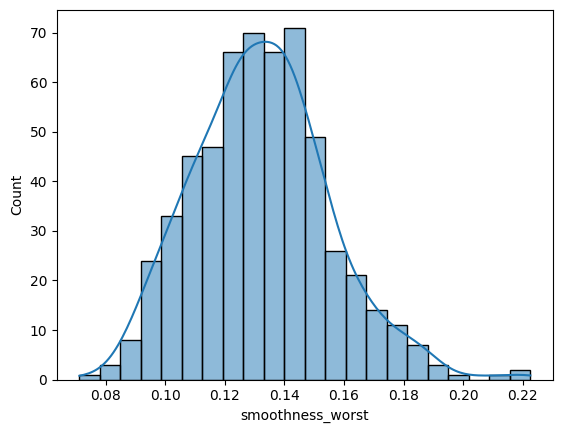

In [157]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'smoothness_worst', kde = True, stat = 'count')

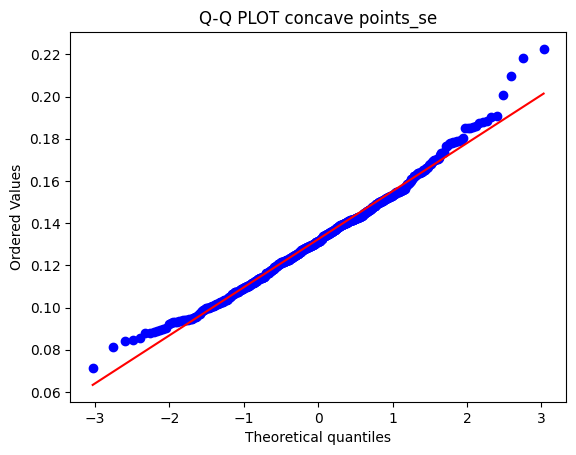

In [158]:
#QQ PLOT
sts.probplot(dados_cancer['smoothness_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [159]:
#box plot par aos outliers
px.box(dados_cancer, y = 'smoothness_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'smoothness_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('NKK0N/jCxD82qz5XW7G/P11txf6ye8' ... 'eMKL0/H4XrUbgexT+duvJZnge3Pw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'smoothness_worst'}}}
})

In [160]:
#outliers
outliers = dados_cancer[dados_cancer['smoothness_worst'] > 0.1883]
outliers['smoothness_worst']
outliers['smoothness_worst'].value_counts().sum()

np.int64(6)

**compactness_worst**

Distribuição aparentemente não segue uma normalidade, 0 valores nulos

16 outliers para o limite superior, uma variabilidade pequena no valor dos registros. Uma calda grande a direita.

In [161]:
#frequencia
dados_cancer['compactness_worst'].value_counts().sort_values()

compactness_worst
0.6656    1
0.3124    1
0.2074    1
0.1364    1
0.1632    1
         ..
0.2170    2
0.1517    2
0.2031    2
0.1486    3
0.3416    3
Name: count, Length: 529, dtype: int64

In [162]:
#valores nulos
dados_cancer['compactness_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='compactness_worst', ylabel='Count'>

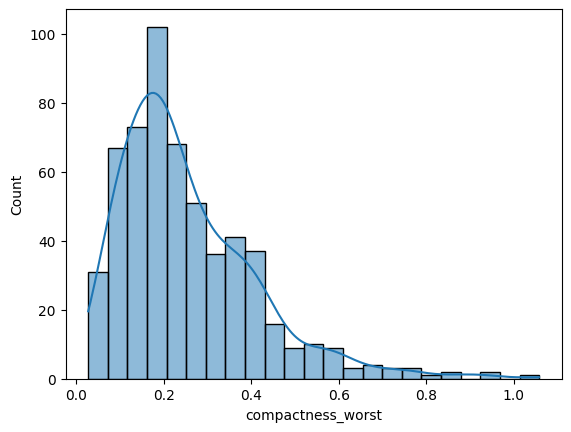

In [163]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'compactness_worst', kde = True, stat = 'count')

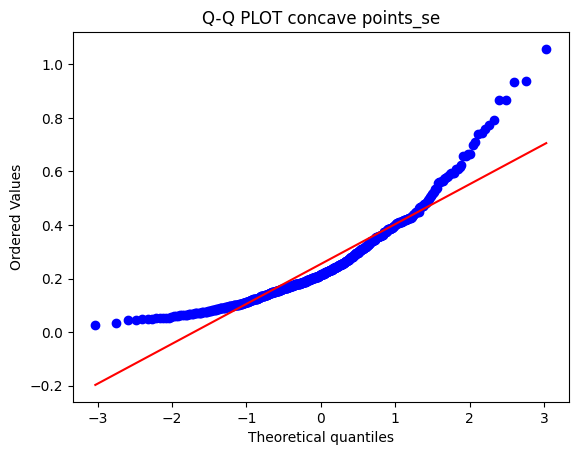

In [164]:
#QQ PLOT
sts.probplot(dados_cancer['compactness_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [165]:
#box plot par aos outliers
px.box(dados_cancer, y = 'compactness_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'compactness_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('lPYGX5hM5T80gLdAguLHP166SQwCK9' ... 'g1zdM/Dwu1pnnH6z+s4o3MI3+wPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'compactness_worst'}}}
})

In [166]:
#outliers
outliers = dados_cancer[dados_cancer['compactness_worst'] > 0.6247]
outliers['compactness_worst']
outliers['compactness_worst'].value_counts().sum()

np.int64(16)

**concavity_worst**

Distribuição aparenta normalidade, 0 valores nulos

42 outliers para o limite superior, uma calda grade a direita, uma pequena variabilidade nos valores do registros e dispersão do dados em relação a reta.



In [167]:
#frequencia
dados_cancer['concavity_worst'].value_counts().sort_values()

concavity_worst
0.07993     1
0.17830     1
0.55390     1
0.09350     1
0.06194     1
           ..
0.18110     2
0.39650     2
0.45040     3
0.13770     3
0.00000    13
Name: count, Length: 539, dtype: int64

In [168]:
#valores nulos
dados_cancer['concavity_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='concavity_worst', ylabel='Count'>

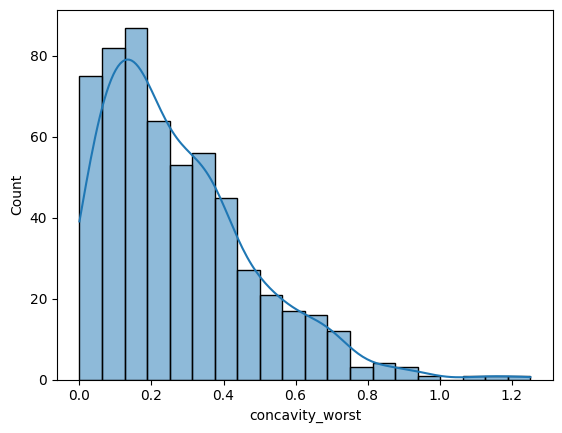

In [169]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concavity_worst', kde = True, stat = 'count')

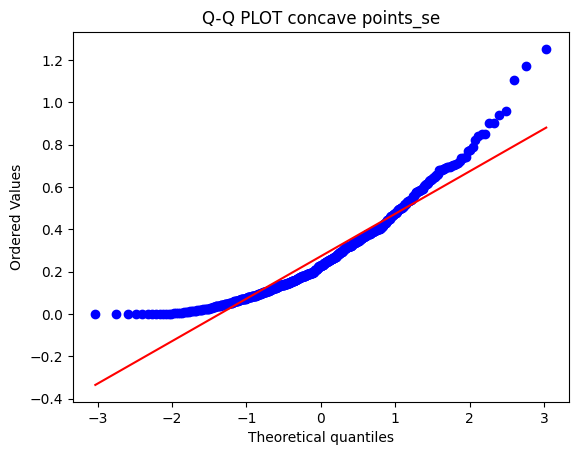

In [170]:
#QQ PLOT
sts.probplot(dados_cancer['concavity_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [171]:
#box plot par aos outliers
px.box(dados_cancer, y = 'compactness_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'compactness_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('lPYGX5hM5T80gLdAguLHP166SQwCK9' ... 'g1zdM/Dwu1pnnH6z+s4o3MI3+wPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'compactness_worst'}}}
})

In [172]:
#outliers
outliers = dados_cancer[dados_cancer['concavity_worst'] > 0.6247]
outliers['concavity_worst']
outliers['concavity_worst'].value_counts().sum()

np.int64(42)

**concave points_worst**
Absoluta certeza que segue uma distribuição normal, contendo 0 valores nulos

0 outliers, uma variabilidade nos dados no registros e dispersão quase nula.

In [173]:
#frequencia
dados_cancer['concave points_worst'].value_counts().sort_values()

concave points_worst
0.27010     1
0.06493     1
0.09127     1
0.02232     1
0.09653     1
           ..
0.02564     3
0.04306     3
0.05556     3
0.18270     3
0.00000    13
Name: count, Length: 492, dtype: int64

In [174]:
#valores nulos
dados_cancer['concave points_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_worst', ylabel='Count'>

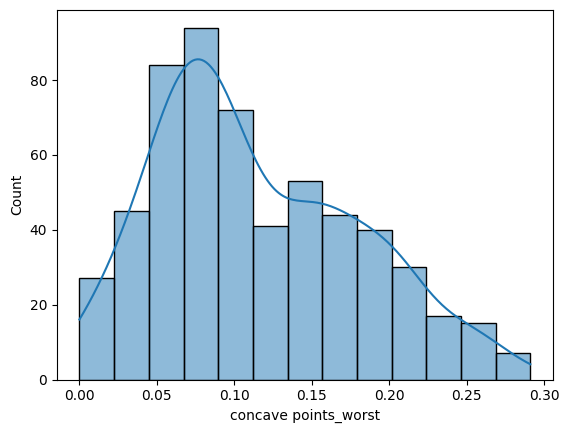

In [175]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_worst', kde = True, stat = 'count')

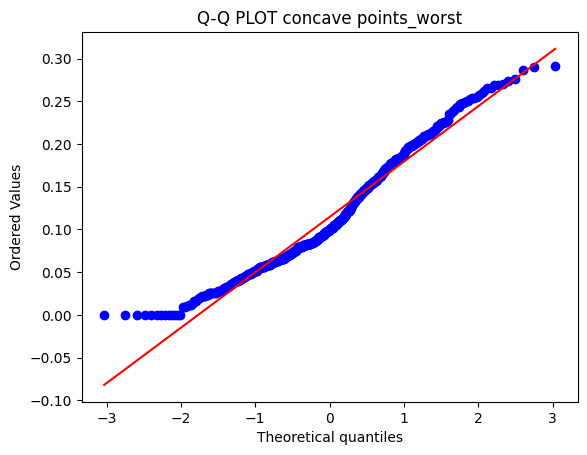

In [176]:
#QQ PLOT
sts.probplot(dados_cancer['concave points_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_worst')
plt.show()

In [177]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concave points_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'concave points_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('B/AWSFD80D8CK4cW2c7HP7TIdr6fGs' ... '2AJsI/9ihcj8L10D8AAAAAAAAAAA=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'concave points_worst'}}}
})

In [178]:
#outliers
outliers = dados_cancer[dados_cancer['concave points_worst'] > 0.291]
outliers['concave points_worst']
outliers['concave points_worst'].value_counts().sum()

np.int64(0)

**symmetry_worst**

Distribuição aparentemente normal, 0 valores nulos

23 Outliers para o limite superior, uma variabilidade baixa na dispersão dos dados, calda à direita.

In [179]:
#frequencia
dados_cancer['symmetry_worst'].value_counts().sort_values()

symmetry_worst
0.2329    1
0.2060    1
0.2218    1
0.6638    1
0.3706    1
         ..
0.2226    3
0.3196    3
0.2972    3
0.3109    3
0.2369    3
Name: count, Length: 500, dtype: int64

In [180]:
#valores nulos
dados_cancer['symmetry_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_worst', ylabel='Count'>

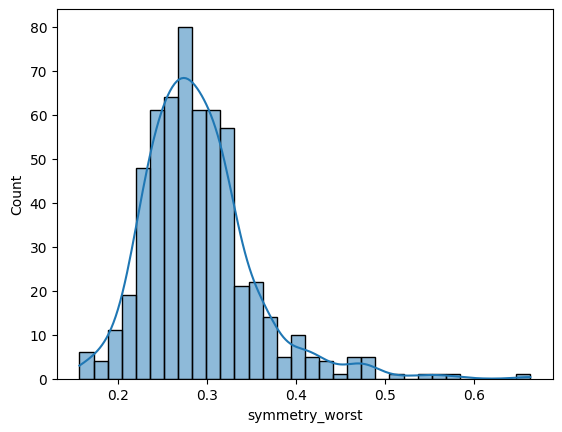

In [181]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_worst', kde = True, stat = 'count')

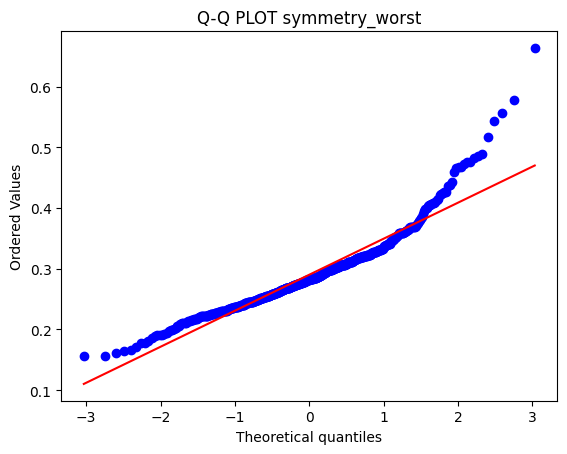

In [182]:
#QQ PLOT
sts.probplot(dados_cancer['symmetry_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT symmetry_worst')
plt.show()

In [183]:
#box plot par aos outliers
px.box(dados_cancer, y = 'symmetry_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'symmetry_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('Ne84RUdy3T+amZmZmZnRPwHeAgmKH9' ... 'HxY8w/RwN4CyQo2j9Wn6ut2F/SPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'symmetry_worst'}}}
})

In [184]:
#outliers
outliers = dados_cancer[dados_cancer['symmetry_worst'] > 0.4154]
outliers['symmetry_worst']
outliers['symmetry_worst'].value_counts().sum()

np.int64(23)

**fractal_dimension_worst**

Distribuição aparentemente normal, 0 valores nulos

24 outliers para o limite superior, uma variabilidade baixa na dispersão dos registros, calda a direita.

In [185]:
#frequencia
dados_cancer['fractal_dimension_worst'].value_counts().sort_values()

fractal_dimension_worst
0.09618    1
0.07569    1
0.08758    1
0.09970    1
0.09938    1
          ..
0.09136    2
0.07863    2
0.07127    2
0.12520    2
0.07427    3
Name: count, Length: 535, dtype: int64

In [186]:
#valores nulos
dados_cancer['fractal_dimension_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

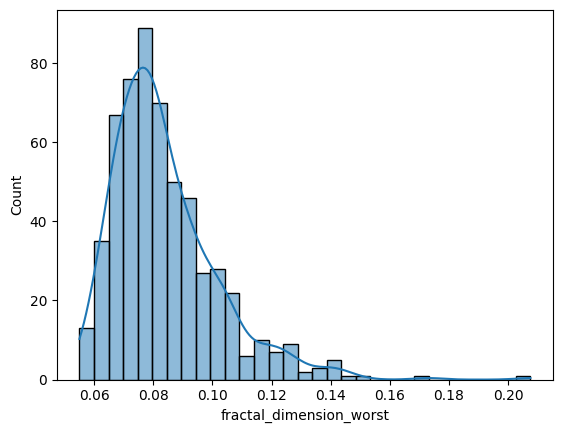

In [187]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'fractal_dimension_worst', kde = True, stat = 'count')

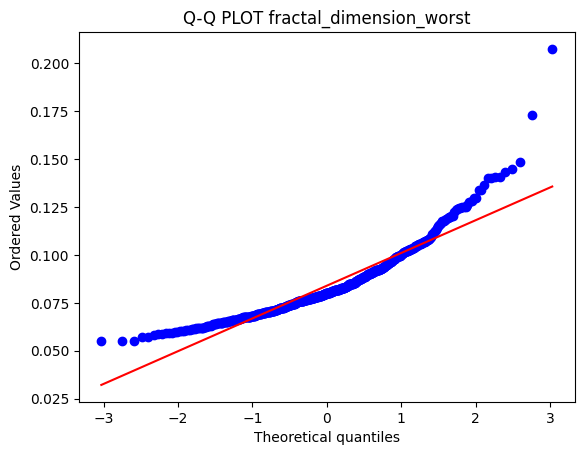

In [188]:
#QQ PLOT
sts.probplot(dados_cancer['fractal_dimension_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT fractal_dimension_worst')
plt.show()

In [189]:
#box plot par aos outliers
px.box(dados_cancer, y = 'fractal_dimension_worst')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'fractal_dimension_worst=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AJF++zpwvj+ZnrDEA8q2P0GfyJOka7' ... 'rqBLQ/WDm0yHa+vz8TJ/c7FAWyPw=='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'fractal_dimension_worst'}}}
})

In [190]:
#outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_worst'] > 0.1224]
outliers['fractal_dimension_worst']
outliers['fractal_dimension_worst'].value_counts().sum()

np.int64(24)

#**TRATAMENTO DAS VARIAVEIS**

**Tratamento de valores missing em registros ou colunas**

In [191]:
#variaveis e seus valores nulos.
dados_cancer.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Coluna: 'Unnamed: 32', era a unica que possuia algum valor nulo e não estava na matriz original dos dados, resumindo, não servia para nada.**

In [5]:
#excluindo valores nulos
dados_cancer.drop(['Unnamed: 32'],axis = 1, inplace = True)
display(dados_cancer.head())
dados_cancer.shape

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

(569, 32)

**Coluna: 'id', está sendo excluida por não servir para previsão, somente é utilizada para identificação no banco de dados do sistema.**

In [7]:
#excluindo coluna ID
dados_cancer.drop(['id'], axis = 1, inplace= True)
display(dados_cancer.head())
dados_cancer.shape

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

(569, 31)

**Analise Descritiva do dataset**

In [13]:
#estatistica das variaveis
dados_cancer.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [15]:
#salvando dataframe pós analisado e tratado
dados_cancer.to_csv('dados_cancer_tratado.csv', sep = ',', encoding = 'iso-8859-1', index = False)

**PRÉ PROCESSAMENTO DOS DADOS**

Substituição das variaveis categoricas

diagnosis: 0 = M (maligno), 1 = (benigno)

Separação previsores e alvo, treino e teste

**Legenda das variaveis**

**ALVO:**
diagnosis: M = 0, B = 1

**PREVISORES:**
todas as 30 variaveis.





#**SEPARANDO TREINO E TESTE (EVITAR VAZAMENTO DOS DADOS)**



In [3]:
#Importando a base de dados analisada e tratada
dados_cancer_tratado = pd.read_csv('../data/processed/dados_cancer_tratado.csv', sep = ',', encoding = 'iso-8859-1')
display(dados_cancer_tratado.head())

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [4]:
#previsores
treino = dados_cancer_tratado.drop(['diagnosis'], axis = 1)
display(treino.head())
treino.shape

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

(569, 30)

In [5]:
#alvo
teste = dados_cancer['diagnosis']
#transformando as classes em binario
labell_encoder = LabelEncoder() #Encoder
teste_encodgin = labell_encoder.fit_transform(teste) #transformando
print(teste_encodgin) #exibição do array
labell_encoder.classes_ #descobrindo o valor da transformação de cada classe

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

array(['B', 'M'], dtype=object)

In [6]:
#separando os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(treino, teste_encodgin, test_size= 0.3, random_state= 3)

In [7]:
#separando ordinais e nominais
binarias = ['diagnosis']
numericas = [coluna for coluna in treino.columns if coluna not in binarias]

In [8]:
kfold = KFold(n_splits= 30, shuffle = True, random_state = 5)
#pre-processamento, escalonando as features.
previsores_esc = ColumnTransformer(
    transformers = [
        ('numeric', StandardScaler(), numericas)
    ]
)

**RESUMO DO PRÉ-PROCESSAMENTO**

previsores: conjunto das variaveis previsoras, com as variaveis qualitativas nominais transformanda em ordinais pelo LabelEncoder

previsores_esc: conjunto das variaveis previsoras ja transformanda (LabelEncoder) e escalonada

**kfold = (n_splits = 30, shuffle = True, random_state = 5)**


### PIPELINE DOS ALGORTIMOS ###

In [69]:
# PIPELINE PARA NAIVE BAYES
pipeline_previsores_Naive = Pipeline([
    ('clt', GaussianNB())
])

pipeline_previsores_esc_Naive = Pipeline([
    ('pre', previsores_esc),
    ('clt', GaussianNB())
])

# PIPELINE PARA MAQUINAS DE VETOR DE SUPORTE (SVC)
pipeline_previsores_SVC = Pipeline([
    ('clt', SVC(random_state = 0, probability = True))
])
pipeline_previsores_esc_SVC = Pipeline([
    ('pre-processamento',previsores_esc),
    ('clt', SVC(random_state = 0, probability = True))
])

# PIPELINE PARA REGRESSÃO LOGISTICA
pipeline_previsores_LG = Pipeline([
    ('clt', LogisticRegression(random_state = 0 ))
])
pipeline_previsores_esc_LG = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', LogisticRegression(random_state = 0 ))
])

# PIPELINE KNN
pipeline_previsores_KNN = Pipeline([
    ('clt', KNeighborsClassifier())
])
pipeline_previsores_esc_KNN = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', KNeighborsClassifier())
])

# PIPELINE ARVORE DE DECISÃO
pipeline_previsores_TREE = Pipeline([
    ('clt', DecisionTreeClassifier(random_state = 0 ))
])
pipeline_previsores_esc_TREE = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', DecisionTreeClassifier(random_state = 0 ))
])

# PIPELINE RANDOM FOREST
pipeline_previsores_FOREST = Pipeline([
    ('clt', RandomForestClassifier(random_state = 0 ))
])
pipeline_previsores_esc_FOREST = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', RandomForestClassifier(random_state = 0 ))
])

# PIPELINE XGBOOST
pipeline_previsores_XGB = Pipeline([
    ('clt', XGBClassifier(random_state = 0 ))
])
pipeline_previsores_esc_XGB = Pipeline([
    ('pre-processamento', previsores_esc),
    ('clt', XGBClassifier(random_state = 0 ))
])

# PIPELINE LIGHT GBM
pipeline_previsores_LGBM = Pipeline([
    ('clt', LGBMClassifier(random_state = 0 ))
])
pipeline_previsores_esc_LGBM = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', LGBMClassifier(random_state = 0 ))
])

# PIPELINE CATBOOST
pipeline_previsores_XGB = Pipeline([
    ('clt', CatBoostClassifier(random_state = 0 ))
])
pipeline_previsores_esc_XGB = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', CatBoostClassifier(random_state = 0 ))
])

# PIPELINE MLPCLASSIFIER
pipeline_previsores_MLP = Pipeline([
    ('clt', MLPClassifier(random_state = 0 ))
])
pipeline_previsores_esc_MLP = Pipeline([
    ('pre-processamento',  previsores_esc),
    ('clt', MLPClassifier(random_state = 0 ))
])


#**NAIVE BAYES**


**Previsores (somente LabelEncoding)**

In [205]:
#treinamento e teste
print('\n Avaliação em dados de teste previsores')
pipeline_previsores.fit(x_train, y_train)
previsores_xteste = pipeline_previsores.predict(x_test)
print('Acurácia do teste previsores: {:.2%}'.format(accuracy_score(y_test, previsores_xteste)))
confusion_matrix(y_test, previsores_xteste)


 Avaliação em dados de teste previsores
Acurácia do teste previsores: 94.74%


array([[106,   3],
       [  6,  56]])

In [206]:
#estatistica geral do modelo
print(classification_report(y_test, previsores_xteste))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.95      0.90      0.93        62

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [207]:
#treinamento e teste do treino
print('\n Avaliação da acurácia do treino')
previsores_xtreino = pipeline_previsores.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino)))
confusion_matrix(y_train, previsores_xtreino)


 Avaliação da acurácia do treino
Acurácia do treino: 93.72%


array([[243,   5],
       [ 20, 130]])

In [208]:
#estatistica geral do modelo de treino
print(classification_report(y_train, previsores_xtreino))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       248
           1       0.96      0.87      0.91       150

    accuracy                           0.94       398
   macro avg       0.94      0.92      0.93       398
weighted avg       0.94      0.94      0.94       398



In [209]:
#validação cruzada
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)
modelo = GaussianNB()
resultado = cross_val_score(modelo, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação: {:.2%}'.format(resultado.mean()))

Acurácia da validação: 93.82%


**Previsores_esc**

In [210]:
#acurácia do teste
print('\n Avaliação em dados de teste previsores_esc')
pipeline_previsores_esc.fit(x_train, y_train)
previsores_esc_xteste = pipeline_previsores_esc.predict(x_test)
print('Acurácia do teste previsores_esc: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste)))
confusion_matrix(y_test, previsores_esc_xteste)


 Avaliação em dados de teste previsores_esc
Acurácia do teste previsores_esc: 94.15%


array([[104,   5],
       [  5,  57]])

In [211]:
#estatistica geral
print(classification_report(y_test, previsores_esc_xteste))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.92      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [212]:
#acurácia no treino
print('\n Avaliação da acurácia do treino')
previsores_esc_xtreino = pipeline_previsores_esc.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino)))
confusion_matrix(y_train, previsores_esc_xtreino)



 Avaliação da acurácia do treino
Acurácia do treino: 93.72%


array([[240,   8],
       [ 17, 133]])

In [213]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc, treino, teste_encodgin, cv = 30)
print('acurácia: {:.2%}'.format(resultado.mean()))

acurácia: 93.32%


#**MAQUINA DE VETOR DE SUPORTE (SVC)**

In [81]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_SVC = GridSearchCV(estimator = pipeline_previsores_SVC, 
                                   param_grid = {'clt__kernel':['rbf','linear','poly','sigmoid'], 'clt__C':[1.0,2.0,3.0], 'clt__class_weight':[None,'balanced']}, scoring = 'roc_auc', cv = 4)
parametros_grid_SVC.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_SVC.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_SVC.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_SVC =  parametros_grid_SVC.best_estimator_

Melhores parametros: {'clt__C': 2.0, 'clt__class_weight': 'balanced', 'clt__kernel': 'linear'}
Melhor score (roc_auc): 99.06%


In [67]:
# MODELO ESCOLHIDO
melhor_pipeline_SVC

Pipeline(steps=[('clt',
                 SVC(C=2.0, class_weight='balanced', kernel='linear',
                     probability=True, random_state=0))])

In [69]:
# TREINO
print('Previsores(sem escalonar) SVM - Treino')
previsoes_train = melhor_pipeline_SVC.predict(x_train)
print('Acurácia previsores(sem escalonar) SVM: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
confusion_matrix(y_train, previsoes_train)

Previsores(sem escalonar) SVM - Treino
Acurácia previsores(sem escalonar) SVM: 96.98%


array([[239,   9],
       [  3, 147]])

In [71]:
# TESTE
print('Previsores (Sem Escalonar) SVM - Teste')
previsoes_test = melhor_pipeline_SVC.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_SVC.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (Sem Escalonar) SVM - Teste
Matriz de confusão do teste
[[104   5]
 [  4  58]]
Acurácia (teste): 94.74%
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

AUC (ROC): 99.50%


In [75]:
# VALIDAÇÃO CRUZADA
resultado_svm = cross_val_score(melhor_pipeline_SVC, treino, teste_encodgin, cv = kfold, scoring = 'recall')
print('Recall Médio: {:.2%}'.format(resultado_svm.mean()))

Recall Médio: 95.33%


**previsores_esc**

In [85]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_esc_SVC = GridSearchCV(estimator = pipeline_previsores_esc_SVC, 
                                   param_grid = {'clt__kernel':['rbf','linear','poly','sigmoid'], 'clt__C':[1.0,2.0,3.0], 'clt__class_weight':[None,'balanced']}, scoring = 'roc_auc', cv = 4)
parametros_grid_esc_SVC.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_esc_SVC.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_esc_SVC.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_esc_SVC =  parametros_grid_esc_SVC.best_estimator_

Melhores parametros: {'clt__C': 2.0, 'clt__class_weight': 'balanced', 'clt__kernel': 'rbf'}
Melhor score (roc_auc): 99.55%


In [91]:
# MODELO
melhor_pipeline_esc_SVC

Pipeline(steps=[('pre-processamento',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('clt',
                 SVC(C=2.0, class_weight='balanced', probability=True,
                     random_state=0))])

In [95]:
# TREINO
print('Previsores(sem escalonar) SVM - Treino')
previsoes_train_esc = melhor_pipeline_esc_SVC.predict(x_train)
print('Acurácia previsores(sem escalonar) SVM: {:.2%}'.format(accuracy_score(y_train, previsoes_train_esc)))

print('Matriz de confusão do treino')
print(confusion_matrix(y_train, previsoes_train_esc))

#estatistica geral do teste
print(classification_report(y_train, previsoes_train_esc))

# ROC AUC
prababilidades_esc = melhor_pipeline_SVC.predict_proba(x_train)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_train, prababilidades_esc)))

Previsores(sem escalonar) SVM - Treino
Acurácia previsores(sem escalonar) SVM: 98.99%
Matriz de confusão do treino
[[247   1]
 [  3 147]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       248
           1       0.99      0.98      0.99       150

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

AUC (ROC): 99.54%


In [89]:
# TESTE
print('Previsores (Sem Escalonar) SVM - Teste')
previsoes_test_esc = melhor_pipeline_esc_SVC.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test_esc))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test_esc)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test_esc))

# ROC AUC
prababilidades_esc = melhor_pipeline_SVC.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades_esc)))

Previsores (Sem Escalonar) SVM - Teste
Matriz de confusão do teste
[[107   2]
 [  2  60]]
Acurácia (teste): 97.66%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC (ROC): 99.50%


In [97]:
# VALIDAÇÃO CRUZADA DO RECALL
resultado_svm = cross_val_score(melhor_pipeline_esc_SVC, treino, teste_encodgin, cv = kfold, scoring = 'recall')
print('Recall Médio: {:.2%}'.format(resultado_svm.mean()))

Recall Médio: 96.83%


In [60]:
# CRIA UM DATAFRAME QUE SERÁ ALIMENTADA PELOS MODELOS E SUAS METRICAS
resultados_modelos = pd.DataFrame({'MODELO':['SVM (ESCALONADO)'], 'ACURACIA (%)': [97.66], 'PRECISION (%)': [97.0], 
                                   'RECALL (%)': [97.0], 'F1-SCORE (%)': [97.0], 'ROC_AUC (%)': [99.50], 'RECALL MÉDIO (%)': [96.83]})
resultados_modelos

MODELO  ACURACIA (%)  PRECISION (%)  RECALL (%)  F1-SCORE (%)  \
0  SVM (ESCALONADO)         97.66           97.0        97.0          97.0   

   ROC_AUC (%)  RECALL MÉDIO (%)  
0         99.5             96.83

#**Regressão Logística**

**PREVISORES**

In [50]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_LG = RandomizedSearchCV(estimator = pipeline_previsores_LG, 
                                   param_distributions = {'clt__solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag'], 'clt__penalty': ['l1', 'l2'],
                                                 'clt__class_weight':[None,'balanced'], 'clt__tol':[0.0001,0.0002,0.0003],'clt__C':stats.randint(1,4), 'clt__max_iter': stats.randint(200,400)},
scoring = 'roc_auc', cv = 4)
parametros_grid_LG.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_LG.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_LG.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_LG =  parametros_grid_LG.best_estimator_

C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs faile

Melhores parametros: {'clt__C': 3, 'clt__class_weight': 'balanced', 'clt__max_iter': 338, 'clt__penalty': 'l2', 'clt__solver': 'lbfgs', 'clt__tol': 0.0001}
Melhor score (roc_auc): 99.32%


C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\User

In [52]:
# MELHOR PIPELINE
melhor_pipeline_LG

Pipeline(steps=[('clt',
                 LogisticRegression(C=3, class_weight='balanced', max_iter=338,
                                    random_state=0))])

In [58]:
# TREINO
print('Previsores(sem escalonar) LOGISTIC REGRESSION - Treino')
previsoes_train = melhor_pipeline_LG.predict(x_train)
print(confusion_matrix(y_train, previsoes_train))
print('Acurácia previsores(sem escalonar) SVM: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
# estatisca geral do teste
print(classification_report(y_train, previsoes_train))


Previsores(sem escalonar) LOGISTIC REGRESSION - Treino
[[238  10]
 [  6 144]]
Acurácia previsores(sem escalonar) SVM: 95.98%
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       248
           1       0.94      0.96      0.95       150

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



In [60]:
# TESTE
print('Previsores (Sem Escalonar) LOGISTIC REGRESSION - Teste')
previsoes_test = melhor_pipeline_LG.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_LG.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (Sem Escalonar) LOGISTIC REGRESSION - Teste
Matriz de confusão do teste
[[104   5]
 [  4  58]]
Acurácia (teste): 94.74%
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

AUC (ROC): 99.30%


In [70]:
# VALIDAÇÃO CRUZADA DO RECALL TESTE
resultado_LG = cross_val_score(melhor_pipeline_LG, treino, teste_encodgin, cv = kfold, scoring = 'recall')

C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 338 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=338).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 338 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=338).
You might also want to scale the data as shown in:
    htt

In [72]:
# RESULTADO DA VALIDAÇÃO CRUZADA TESTE
print('Recall Médio: {:.2%}'.format(resultado_LG.mean()))

Recall Médio: 94.87%


**previsores_esc**

In [78]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_esc_LG = RandomizedSearchCV(estimator = pipeline_previsores_esc_LG, 
                                   param_distributions = {'clt__solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag'], 'clt__penalty': ['l1', 'l2'],
                                                 'clt__class_weight':[None,'balanced'], 'clt__tol':[0.0001,0.0002,0.0003],'clt__C':stats.randint(1,4), 'clt__max_iter': stats.randint(200,400)},
scoring = 'roc_auc', cv = 4)
parametros_grid_esc_LG.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_esc_LG.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_esc_LG.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_esc_LG =  parametros_grid_esc_LG.best_estimator_

C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Melhores parametros: {'clt__C': 1, 'clt__class_weight': 'balanced', 'clt__max_iter': 276, 'clt__penalty': 'l1', 'clt__solver': 'liblinear', 'clt__tol': 0.0001}
Melhor score (roc_auc): 99.54%


C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brito\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\User

In [94]:
# TREINO
print('Previsores (escalonado) LOGISTIC REGRESSION - Treino')
previsoes_train = melhor_pipeline_esc_LG.predict(x_train)
print(confusion_matrix(y_train, previsoes_train))
print('Acurácia previsores (escalonado) SVM: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
# estatisca geral do teste
print(classification_report(y_train, previsoes_train))
# ROC AUC
prababilidades = melhor_pipeline_esc_LG.predict_proba(x_train)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_train, prababilidades)))

Previsores (escalonado) LOGISTIC REGRESSION - Treino
[[245   3]
 [  2 148]]
Acurácia previsores (escalonado) SVM: 98.74%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       248
           1       0.98      0.99      0.98       150

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

AUC (ROC): 99.75%


In [90]:
# TESTE
print('Previsores (Escalonado) LOGISTIC REGRESSION - Teste')
previsoes_test = melhor_pipeline_esc_LG.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_esc_LG.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (Escalonado) LOGISTIC REGRESSION - Teste
Matriz de confusão do teste
[[107   2]
 [  3  59]]
Acurácia (teste): 97.08%
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       109
           1       0.97      0.95      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC (ROC): 99.73%


In [100]:
# VALIDAÇÃO CRUZADA DO RECALL TEST
resultado_esc_LG = cross_val_score(melhor_pipeline_esc_LG, treino, teste_encodgin, cv = kfold, scoring = 'recall')

In [102]:
# RESULTADO DA VALIDAÇÃO CRUZADA TESTE
print('Recall Médio: {:.2%}'.format(resultado_esc_LG.mean()))

Recall Médio: 96.26%


In [61]:
novo_modelo_LG = {'MODELO':['LOGISTIC REGRESSION (ESCALONADO)'], 'ACURACIA (%)': [97.08], 'PRECISION (%)': [97.0], 
                                   'RECALL (%)': [95.0], 'F1-SCORE (%)': [96.0], 'ROC_AUC (%)': [99.73], 'RECALL MÉDIO (%)': [96.26]}
resultados_modelos = pd.concat([resultados_modelos, pd.DataFrame(novo_modelo_LG)], ignore_index = True)

In [62]:
display(resultados_modelos.reset_index(drop = True))

MODELO  ACURACIA (%)  PRECISION (%)  RECALL (%)  \
0                  SVM (ESCALONADO)         97.66           97.0        97.0   
1  LOGISTIC REGRESSION (ESCALONADO)         97.08           97.0        95.0   

   F1-SCORE (%)  ROC_AUC (%)  RECALL MÉDIO (%)  
0          97.0        99.50             96.83  
1          96.0        99.73             96.26

#**KNN**


In [ ]:
**PREVISORES**

In [39]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_KNN = GridSearchCV(estimator = pipeline_previsores_KNN, 
                                   param_grid = {'clt__metric':['minkowski', 'manhattan','euclidean'], 'clt__p': list(range(1,3)),
                                                'clt__n_neighbors': list(range(5,10))}, scoring = 'roc_auc', cv = 4)
parametros_grid_KNN.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_KNN.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_KNN.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_KNN =  parametros_grid_KNN.best_estimator_

Melhores parametros: {'clt__metric': 'minkowski', 'clt__n_neighbors': 9, 'clt__p': 2}
Melhor score (roc_auc): 97.54%


In [41]:
# MELHOR PIPELINE
melhor_pipeline_KNN

Pipeline(steps=[('clt', KNeighborsClassifier(n_neighbors=9))])

In [45]:
# TREINO
print('Previsores(Sem escalonar) KNNN - Treino')
previsoes_train = melhor_pipeline_KNN.predict(x_train)
print(confusion_matrix(y_train, previsoes_train))
print('Acurácia previsores(Sem escalonar) KNN: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
# estatisca geral do teste
print(classification_report(y_train, previsoes_train))


Previsores(sem escalonar) KNNN - Treino
[[239   9]
 [ 17 133]]
Acurácia previsores(sem escalonar) KNN: 93.47%
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       248
           1       0.94      0.89      0.91       150

    accuracy                           0.93       398
   macro avg       0.94      0.93      0.93       398
weighted avg       0.93      0.93      0.93       398



In [47]:
# TESTE
print('Previsores (Sem Escalonar) KNN - Teste')
previsoes_test = melhor_pipeline_KNN.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_KNN.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (Sem Escalonar) KNN - Teste
Matriz de confusão do teste
[[106   3]
 [  6  56]]
Acurácia (teste): 94.74%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.95      0.90      0.93        62

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

AUC (ROC): 94.50%


In [49]:
# VALIDAÇÃO CRUZADA DO RECALL TESTE
resultado_KNN = cross_val_score(melhor_pipeline_KNN, treino, teste_encodgin, cv = kfold, scoring = 'recall')

In [51]:
# RESULTADO DA VALIDAÇÃO CRUZADA TESTE
print('Recall Médio: {:.2%}'.format(resultado_KNN.mean()))

Recall Médio: 89.61%


**previsores_esc**

In [57]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_esc_KNN = GridSearchCV(estimator = pipeline_previsores_esc_KNN, 
                                   param_grid = {'clt__metric':['minkowski', 'manhattan','euclidean'], 'clt__p': list(range(1,3)),
                                                'clt__n_neighbors': list(range(5,10))}, scoring = 'roc_auc', cv = 4)
parametros_grid_esc_KNN.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_esc_KNN.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_esc_KNN.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_esc_KNN =  parametros_grid_esc_KNN.best_estimator_

Melhores parametros: {'clt__metric': 'minkowski', 'clt__n_neighbors': 7, 'clt__p': 2}
Melhor score (roc_auc): 98.94%


In [61]:
# TREINO
print('Previsores (escalonado) KNN - Treino')
previsoes_train = melhor_pipeline_esc_KNN.predict(x_train)
print(confusion_matrix(y_train, previsoes_train))
print('Acurácia previsores (escalonado) SVM: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
# estatisca geral do teste
print(classification_report(y_train, previsoes_train))
# ROC AUC
prababilidades = melhor_pipeline_esc_KNN.predict_proba(x_train)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_train, prababilidades)))

Previsores (escalonado) KNN - Treino
[[246   2]
 [  9 141]]
Acurácia previsores (escalonado) SVM: 97.24%
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       248
           1       0.99      0.94      0.96       150

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

AUC (ROC): 99.60%


In [73]:
# TESTE
print('Previsores (Escalonado) KNN - Teste')
previsoes_test = melhor_pipeline_esc_KNN.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_esc_KNN.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (Escalonado) KNN - Teste
Matriz de confusão do teste
[[107   2]
 [  5  57]]
Acurácia (teste): 95.91%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.97      0.92      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC (ROC): 99.50%


In [67]:
# VALIDAÇÃO CRUZADA DO RECALL TESTE
resultado_esc_KNN = cross_val_score(melhor_pipeline_esc_KNN, treino, teste_encodgin, cv = kfold, scoring = 'recall')

In [75]:
# RESULTADO DA VALIDAÇÃO CRUZADA TESTE
print('Recall Médio: {:.2%}'.format(resultado_esc_KNN.mean()))

Recall Médio: 93.67%


In [63]:
# INSERINDO O MELHOR ALGORTIMO NO DATASET DE ANALISE ESTATISTICA DOS ALGORTIMOS
novo_modelo_KNN = {'MODELO':['KNN (ESCALONADO)'], 'ACURACIA (%)': [95.91], 'PRECISION (%)': [97.0], 
                                   'RECALL (%)': [92.0], 'F1-SCORE (%)': [94.0], 'ROC_AUC (%)': [99.50], 'RECALL MÉDIO (%)': [93.67]}
resultados_modelos = pd.concat([resultados_modelos, pd.DataFrame(novo_modelo_KNN)], ignore_index = True)

In [64]:
# exibindo
display(resultados_modelos)

MODELO  ACURACIA (%)  PRECISION (%)  RECALL (%)  \
0                  SVM (ESCALONADO)         97.66           97.0        97.0   
1  LOGISTIC REGRESSION (ESCALONADO)         97.08           97.0        95.0   
2                  KNN (ESCALONADO)         95.91           97.0        92.0   

   F1-SCORE (%)  ROC_AUC (%)  RECALL MÉDIO (%)  
0          97.0        99.50             96.83  
1          96.0        99.73             96.26  
2          94.0        99.50             93.67

#**ARVORE DE DECISÃO**

In [129]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_TREE = RandomizedSearchCV(estimator = pipeline_previsores_TREE, 
                                   param_distributions = {'clt__criterion':['gini', 'entropy','log_loss'], 'clt__max_depth': stats.randint(1,10),
                                                'clt__min_samples_leaf': stats.randint(2,8),'clt__min_samples_split': stats.randint(1,8), 'clt__splitter': ['best','random']}
                                         ,scoring = 'roc_auc', cv = 4)
parametros_grid_TREE.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_TREE.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_TREE.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_TREE =  parametros_grid_TREE.best_estimator_

Melhores parametros: {'clt__criterion': 'gini', 'clt__max_depth': 5, 'clt__min_samples_leaf': 5, 'clt__min_samples_split': 7, 'clt__splitter': 'random'}
Melhor score (roc_auc): 97.83%


In [131]:
# MELHOR PIPELINE
melhor_pipeline_TREE

Pipeline(steps=[('clt',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=7, random_state=0,
                                        splitter='random'))])

In [137]:
# TREINO
print('Previsores(Sem escalonar) DECISION TREE - Treino')
previsoes_train = melhor_pipeline_TREE.predict(x_train)
print(confusion_matrix(y_train, previsoes_train))
print('Acurácia previsores(Sem escalonar) DECISION TREE: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
# estatisca geral do teste
print(classification_report(y_train, previsoes_train))
#AUC ROC
prababilidades = melhor_pipeline_TREE.predict_proba(x_train)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_train, prababilidades)))


Previsores(Sem escalonar) DECISION TREE - Treino
[[243   5]
 [ 10 140]]
Acurácia previsores(Sem escalonar) DECISION TREE: 96.23%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       248
           1       0.97      0.93      0.95       150

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398

AUC (ROC): 99.42%


In [135]:
# TESTE
print('Previsores (Sem Escalonar) KNN - Teste')
previsoes_test = melhor_pipeline_TREE.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_TREE.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (Sem Escalonar) KNN - Teste
Matriz de confusão do teste
[[104   5]
 [  5  57]]
Acurácia (teste): 94.15%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.92      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

AUC (ROC): 95.41%


In [139]:
# VALIDAÇÃO CRUZADA DO RECALL TESTE
resultado_TREE = cross_val_score(melhor_pipeline_TREE, treino, teste_encodgin, cv = kfold, scoring = 'recall')

In [141]:
# RESULTADO DA VALIDAÇÃO CRUZADA TESTE
print('Recall Médio: {:.2%}'.format(resultado_TREE.mean()))

Recall Médio: 88.98%


**previsores_esc**

In [151]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_esc_TREE = RandomizedSearchCV(estimator = pipeline_previsores_esc_TREE, 
                                   param_distributions = {'clt__criterion':['gini', 'entropy','log_loss'], 'clt__max_depth': stats.randint(1,10),
                                                'clt__min_samples_leaf': stats.randint(2,8),'clt__min_samples_split': stats.randint(2,8), 'clt__splitter': ['best','random']}
                                         ,scoring = 'roc_auc', cv = 4)
parametros_grid_esc_TREE.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_esc_TREE.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_esc_TREE.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_esc_TREE =  parametros_grid_esc_TREE.best_estimator_

Melhores parametros: {'clt__criterion': 'log_loss', 'clt__max_depth': 8, 'clt__min_samples_leaf': 5, 'clt__min_samples_split': 4, 'clt__splitter': 'random'}
Melhor score (roc_auc): 97.54%


In [153]:
# MELHOR PIPELINE
melhor_pipeline_esc_TREE

Pipeline(steps=[('pre-processamento',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'compactness...
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('clt',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=8,
                                        min_samples_leaf=5, min_samples_split=4,
                                        random_state=0, splitter='random'))])

In [155]:
# TREINO
print('Previsores (escalonado) TREE - Treino')
previsoes_train = melhor_pipeline_esc_TREE.predict(x_train)
print(confusion_matrix(y_train, previsoes_train))
print('Acurácia previsores (escalonado) TREE: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
# estatisca geral do teste
print(classification_report(y_train, previsoes_train))
# ROC AUC
prababilidades = melhor_pipeline_esc_TREE.predict_proba(x_train)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_train, prababilidades)))

Previsores (escalonado) TREE - Treino
[[243   5]
 [  9 141]]
Acurácia previsores (escalonado) TREE: 96.48%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       248
           1       0.97      0.94      0.95       150

    accuracy                           0.96       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398

AUC (ROC): 99.55%


In [161]:
# TESTE
print('Previsores (Escalonado) TREE - Teste')
previsoes_test = melhor_pipeline_esc_TREE.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_esc_TREE.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (Escalonado) TREE - Teste
Matriz de confusão do teste
[[104   5]
 [  4  58]]
Acurácia (teste): 94.74%
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

AUC (ROC): 96.52%


In [167]:
# VALIDAÇÃO CRUZADA DO RECALL TESTE
resultado_TREE = cross_val_score(melhor_pipeline_esc_TREE, treino, teste_encodgin, cv = kfold, scoring = 'recall')
# RESULTADO DA VALIDAÇÃO CRUZADA TESTE
print('Recall Médio: {:.2%}'.format(resultado_TREE.mean()))

Recall Médio: 91.08%


In [65]:
# INSERINDO O MELHOR ALGORTIMO NO DATASET DE ANALISE ESTATISTICA DOS ALGORTIMOS
novo_modelo_TREE = {'MODELO':['TREE (ESCALONADO)'], 'ACURACIA (%)': [94.74], 'PRECISION (%)': [92], 
                                   'RECALL (%)': [94.0], 'F1-SCORE (%)': [93.0], 'ROC_AUC (%)': [96.52], 'RECALL MÉDIO (%)': [91.08]}
resultados_modelos = pd.concat([resultados_modelos, pd.DataFrame(novo_modelo_TREE)], ignore_index = True)
display(resultados_modelos)

MODELO  ACURACIA (%)  PRECISION (%)  RECALL (%)  \
0                  SVM (ESCALONADO)         97.66           97.0        97.0   
1  LOGISTIC REGRESSION (ESCALONADO)         97.08           97.0        95.0   
2                  KNN (ESCALONADO)         95.91           97.0        92.0   
3                 TREE (ESCALONADO)         94.74           92.0        94.0   

   F1-SCORE (%)  ROC_AUC (%)  RECALL MÉDIO (%)  
0          97.0        99.50             96.83  
1          96.0        99.73             96.26  
2          94.0        99.50             93.67  
3          93.0        96.52             91.08

#**Random Forest**

In [38]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_FOREST = RandomizedSearchCV(estimator = pipeline_previsores_FOREST, 
                                   param_distributions = {'clt__n_estimators': [100,200,250,350],'clt__criterion':['gini', 'entropy','log_loss'], 'clt__max_depth': stats.randint(1,10),
                                                'clt__min_samples_leaf': stats.randint(2,8),'clt__min_samples_split': stats.randint(1,8), 'clt__class_weight': [None, 'balanced','balanced_subsample']}
                                         ,scoring = 'roc_auc', cv = 4)
parametros_grid_FOREST.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_FOREST.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_FOREST.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_FOREST =  parametros_grid_FOREST.best_estimator_

C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
4 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:

Melhores parametros: {'clt__class_weight': 'balanced_subsample', 'clt__criterion': 'entropy', 'clt__max_depth': 5, 'clt__min_samples_leaf': 4, 'clt__min_samples_split': 6, 'clt__n_estimators': 350}
Melhor score (roc_auc): 99.22%


In [39]:
# TREINO
print('Previsores(Sem escalonar) RANDOM FOREST - Treino')
previsoes_train = melhor_pipeline_FOREST.predict(x_train)
print(confusion_matrix(y_train, previsoes_train))
print('Acurácia previsores(Sem escalonar) RANDOM FOREST: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
# estatisca geral do teste
print(classification_report(y_train, previsoes_train))
#AUC ROC
prababilidades = melhor_pipeline_FOREST.predict_proba(x_train)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_train, prababilidades)))

Previsores(Sem escalonar) RANDOM FOREST - Treino
[[247   1]
 [  2 148]]
Acurácia previsores(Sem escalonar) RANDOM FOREST: 99.25%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       248
           1       0.99      0.99      0.99       150

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

AUC (ROC): 99.94%


In [40]:
# TESTE
print('Previsores (sem escalonar) FOREST - Teste')
previsoes_test = melhor_pipeline_FOREST.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_FOREST.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (sem escalonar) FOREST - Teste
Matriz de confusão do teste
[[105   4]
 [  5  57]]
Acurácia (teste): 94.74%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       109
           1       0.93      0.92      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

AUC (ROC): 99.14%


In [41]:
# VALIDAÇÃO CRUZADA DO RECALL TESTE
resultado_FOREST = cross_val_score(melhor_pipeline_FOREST, treino, teste_encodgin, cv = kfold, scoring = 'recall')
# RESULTADO DA VALIDAÇÃO CRUZADA TESTE
print('Recall Médio: {:.2%}'.format(resultado_FOREST.mean()))

Recall Médio: 95.40%


**previsoes_esc**

In [34]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_esc_FOREST = RandomizedSearchCV(estimator = pipeline_previsores_esc_FOREST, 
                                   param_distributions = {'clt__n_estimators': [100,200,250,350],'clt__criterion':['gini', 'entropy','log_loss'], 'clt__max_depth': stats.randint(1,10),
                                                'clt__min_samples_leaf': stats.randint(2,8),'clt__min_samples_split': stats.randint(1,8), 'clt__class_weight': [None, 'balanced','balanced_subsample']}
                                         ,scoring = 'roc_auc', cv = 4)
parametros_grid_esc_FOREST.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_esc_FOREST.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_esc_FOREST.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_esc_FOREST =  parametros_grid_esc_FOREST.best_estimator_

C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
8 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:

Melhores parametros: {'clt__class_weight': 'balanced_subsample', 'clt__criterion': 'gini', 'clt__max_depth': 9, 'clt__min_samples_leaf': 4, 'clt__min_samples_split': 3, 'clt__n_estimators': 350}
Melhor score (roc_auc): 99.24%


In [35]:
# TREINO
print('Previsores (escalonado) RANDOM FOREST - Treino')
previsoes_train = melhor_pipeline_esc_FOREST.predict(x_train)
print(confusion_matrix(y_train, previsoes_train))
print('Acurácia previsores (escalonado) RANDOM FOREST: {:.2%}'.format(accuracy_score(y_train, previsoes_train)))
# estatisca geral do teste
print(classification_report(y_train, previsoes_train))
# ROC AUC
prababilidades = melhor_pipeline_esc_FOREST.predict_proba(x_train)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_train, prababilidades)))

Previsores (escalonado) RANDOM FOREST - Treino
[[246   2]
 [  2 148]]
Acurácia previsores (escalonado) RANDOM FOREST: 98.99%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       248
           1       0.99      0.99      0.99       150

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

AUC (ROC): 99.93%


In [36]:
# TESTE
print('Previsores (Escalonado) FOREST - Teste')
previsoes_test = melhor_pipeline_esc_FOREST.predict(x_test)

print('Matriz de confusão do teste')
print(confusion_matrix(y_test, previsoes_test))

# ACURÁCIA DO TESTE
print('Acurácia (teste): {:.2%}'.format(accuracy_score(y_test, previsoes_test)))

#estatistica geral do teste
print(classification_report(y_test, previsoes_test))

# ROC AUC
prababilidades = melhor_pipeline_esc_FOREST.predict_proba(x_test)[:, 1]
print('AUC (ROC): {:.2%}'.format(roc_auc_score(y_test, prababilidades)))

Previsores (Escalonado) FOREST - Teste
Matriz de confusão do teste
[[104   5]
 [  5  57]]
Acurácia (teste): 94.15%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.92      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

AUC (ROC): 99.14%


In [37]:
# VALIDAÇÃO CRUZADA DO RECALL TESTE
resultado_FOREST = cross_val_score(melhor_pipeline_esc_FOREST, treino, teste_encodgin, cv = kfold, scoring = 'recall')
# RESULTADO DA VALIDAÇÃO CRUZADA TESTE
print('Recall Médio: {:.2%}'.format(resultado_FOREST.mean()))

Recall Médio: 95.40%


In [66]:
# INSERINDO O MELHOR ALGORTIMO NO DATASET DE ANALISE ESTATISTICA DOS ALGORTIMOS
novo_modelo_FOREST = {'MODELO':['FOREST (SEM ESCALONAR)'], 'ACURACIA (%)': [94.74], 'PRECISION (%)': [93], 
                                   'RECALL (%)': [92.0], 'F1-SCORE (%)': [93.0], 'ROC_AUC (%)': [99.14], 'RECALL MÉDIO (%)': [95.40]}
resultados_modelos = pd.concat([resultados_modelos, pd.DataFrame(novo_modelo_FOREST)], ignore_index = True)
display(resultados_modelos)

MODELO  ACURACIA (%)  PRECISION (%)  RECALL (%)  \
0                  SVM (ESCALONADO)         97.66           97.0        97.0   
1  LOGISTIC REGRESSION (ESCALONADO)         97.08           97.0        95.0   
2                  KNN (ESCALONADO)         95.91           97.0        92.0   
3                 TREE (ESCALONADO)         94.74           92.0        94.0   
4            FOREST (SEM ESCALONAR)         94.74           93.0        92.0   

   F1-SCORE (%)  ROC_AUC (%)  RECALL MÉDIO (%)  
0          97.0        99.50             96.83  
1          96.0        99.73             96.26  
2          94.0        99.50             93.67  
3          93.0        96.52             91.08  
4          93.0        99.14             95.40

#**XGboost**

In [85]:
# SELECIONANDO OS MELHORES PARAMETROS
parametros_grid_XGB = GridSearchCV(estimator = pipeline_previsores_XGB, 
                                   param_grid = {'clt__objective':['binary:logistic'],'clt__n_estimators': range(100,1000,50), 'clt__max_depth': [1,2,3,4,5,6,7,8], 
                                                          'clt__learning_rate': [0.01,0.02,0.03,0.04,0.05]},scoring = 'roc_auc', cv = 4, verbose = 2, n_jobs = 1)
parametros_grid_XGB.fit(x_train, y_train)
# MELHOR HIPERPARAMETROS E SCORING
print('Melhores parametros: {}'.format(parametros_grid_XGB.best_params_))
print('Melhor score (roc_auc): {:.2%}'.format(parametros_grid_XGB.best_score_))
# CRIA O MODELO COM OS MELHORES HIPERPARAMETROS
melhor_pipeline_XGB =  parametros_grid_XGB.best_estimator_

Fitting 4 folds for each of 720 candidates, totalling 2880 fits
[CV] END clt__learning_rate=0.01, clt__max_depth=1, clt__n_estimators=100, clt__objective=binary:logistic; total time=   0.0s
[CV] END clt__learning_rate=0.01, clt__max_depth=1, clt__n_estimators=100, clt__objective=binary:logistic; total time=   0.0s
[CV] END clt__learning_rate=0.01, clt__max_depth=1, clt__n_estimators=100, clt__objective=binary:logistic; total time=   0.0s
[CV] END clt__learning_rate=0.01, clt__max_depth=1, clt__n_estimators=100, clt__objective=binary:logistic; total time=   0.0s
[CV] END clt__learning_rate=0.01, clt__max_depth=1, clt__n_estimators=150, clt__objective=binary:logistic; total time=   0.0s
[CV] END clt__learning_rate=0.01, clt__max_depth=1, clt__n_estimators=150, clt__objective=binary:logistic; total time=   0.0s
[CV] END clt__learning_rate=0.01, clt__max_depth=1, clt__n_estimators=150, clt__objective=binary:logistic; total time=   0.0s
[CV] END clt__learning_rate=0.01, clt__max_depth=1, cl

ValueError: 
All the 2880 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\catboost\core.py", line 5243, in fit
    CatBoostClassifier._check_is_compatible_loss(params['loss_function'])
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\catboost\core.py", line 5613, in _check_is_compatible_loss
    if isinstance(loss_function, str) and not CatBoost._is_classification_objective(loss_function):
                                              ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^
  File "C:\Users\Rodrigo\Desktop\Classificacao-do-cancer-de-mama\venv\Lib\site-packages\catboost\core.py", line 1966, in _is_classification_objective
    return isinstance(loss_function, str) and is_classification_objective(loss_function)
                                              ~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^
  File "_catboost.pyx", line 6411, in _catboost.is_classification_objective
  File "_catboost.pyx", line 6412, in _catboost.is_classification_objective
_catboost.CatBoostError: catboost/private/libs/options/loss_description.cpp:20: binary loss is not supported


In [ ]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(objective = ['binary:logistic'],random_state = [1,2,3,5], n_estimators = [100,200,500], max_depth = [1,2,4,5], learning_rate = [0.02,0.05,0.03,0.08])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['objective'] * len(parametros_grid['random_state'] * len(parametros_grid['n_estimators'] * len(parametros_grid['max_depth'] *  len(parametros_grid['learning_rate'])))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_xg = GridSearchCV(xgboost, parametros_grid, scoring= 'roc_auc', cv = 4)

In [ ]:
grid_xg.fit(x_train, y_train)

In [ ]:
grid_xg.best_params_

In [ ]:
#todos os resultados das combinações
resultado_grid_xg = pd.DataFrame(grid_xg.cv_results_)
resultado_grid_xg.sort_values('rank_test_score', ascending= True)


In [ ]:
#pipelines
pipeline_previsores_xg = Pipeline([
    ('clt',XGBClassifier(objective = 'binary:logistic',learning_rate = 0.08, n_estimators = 500, random_state = 1, max_depth = 1))
])
pipeline_previsores_esc_xg = Pipeline([
    ('pre', previsores_esc),
    ('clt',XGBClassifier(objective = 'binary:logistic',learning_rate = 0.08, n_estimators = 500, random_state = 1, max_depth = 1))
])


In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_xg.fit(x_train, y_train)
previsores_xteste_xg = pipeline_previsores_xg.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_xg)))
confusion_matrix(y_test, previsores_xteste_xg)


In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_xg.fit(x_train, y_train)
previsores_xtreino_xg = pipeline_previsores_xg.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_xg)))
confusion_matrix(y_train, previsores_xtreino_xg)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_xg, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

**previsoes_esc**

In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_esc_xg.fit(x_train, y_train)
previsores_esc_xteste_xg = pipeline_previsores_esc_xg.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_xg)))
confusion_matrix(y_test, previsores_esc_xteste_xg)


In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_esc_xg.fit(x_train, y_train)
previsores_esc_xtreino_xg = pipeline_previsores_esc_xg.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_xg)))
confusion_matrix(y_train, previsores_esc_xtreino_xg)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_xg, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

#**Light GBM**

In [ ]:
#dados para treino
lgbm = LGBMClassifier()

In [ ]:
#hiperparametros
#criando os parametros que serão aplicados no grid
parametros_grid = dict(objective = ['binary'],num_leaves = [120,200,250,300],verbosity = [-1], max_depth = [1,2,3,5], learning_rate = [0.02,0.05,0.03,0.08],max_bin = [120,200,370,425],)
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['objective'] * len(parametros_grid['num_leaves'] * len(parametros_grid['verbosity'] * len(parametros_grid['max_depth'] *  len(parametros_grid['learning_rate'] * len(parametros_grid['max_bin']))))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_lgbm = GridSearchCV(lgbm, parametros_grid, scoring= 'roc_auc', cv = 4)

In [ ]:
#grid
grid_lgbm.fit(x_train, y_train)

In [ ]:
#melhor parametros
grid_lgbm.best_params_

In [ ]:
#todos os resultados das combinações
resultado_grid_lgbm = pd.DataFrame(grid_lgbm.cv_results_)
resultado_grid_lgbm.sort_values('rank_test_score', ascending= True)

In [ ]:
#pipelines
pipeline_previsores_lgbm = Pipeline([
    ('clt',LGBMClassifier(objective = 'binary',learning_rate = 0.08, num_leaves = 120, max_depth = 2, verbosity = -1, max_bin = 120))
])
pipeline_previsores_esc_lgbm = Pipeline([
    ('pre', previsores_esc),
    ('clt',LGBMClassifier(objective = 'binary',learning_rate = 0.08, num_leaves = 120, max_depth = 2, verbosity = -1, max_bin = 120))
])


In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_lgbm.fit(x_train, y_train)
previsores_xteste_lgbm = pipeline_previsores_lgbm.predict(x_test)
print('Acurácia teste: {:.2%}'.format(accuracy_score(y_test,previsores_xteste_lgbm)))
confusion_matrix(y_test,previsores_xteste_lgbm)

In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_lgbm.fit(x_train, y_train)
previsores_xtreino_lgbm = pipeline_previsores_lgbm.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_lgbm)))
confusion_matrix(y_train, previsores_xtreino_lgbm)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_lgbm, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

**previsores_esc**

In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_esc_lgbm.fit(x_train, y_train)
previsores_esc_xteste_lgbm = pipeline_previsores_esc_lgbm.predict(x_test)
print('Acurácia teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xteste_lgbm)))
confusion_matrix(y_test,previsores_esc_xteste_lgbm)

In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_esc_lgbm.fit(x_train, y_train)
previsores_esc_xtreino_lgbm = pipeline_previsores_esc_lgbm.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_lgbm)))
confusion_matrix(y_train, previsores_esc_xtreino_lgbm)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_lgbm, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

#**Catboost**

In [ ]:
catb = CatBoostClassifier()

In [ ]:
#criando os hparametros que serão aplicados no grid
parametros_grid = dict(task_type = ['CPU'],iterations = [300,200],depth = [2,4,5], learning_rate = [0.02,0.05,0.08],eval_metric = ['Accuracy'], random_state = [6,9,2])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['task_type'] * len(parametros_grid['iterations'] * len(parametros_grid['depth'] *  len(parametros_grid['learning_rate'] * len(parametros_grid['eval_metric'] * len(parametros_grid['random_state']))))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
random_catb = RandomizedSearchCV(catb, parametros_grid, scoring= 'roc_auc', cv = 4, n_iter= 40, random_state= 40)

In [ ]:
#passando os dados para o treino do random
random_catb.fit(x_train, y_train)

In [ ]:
#melhor combinação de hp
random_catb.best_params_

In [ ]:
#ranking dos parametros
resultados_random_catb = pd.DataFrame(random_catb.cv_results_)
resultados_random_catb.sort_values('rank_test_score', ascending= True)

In [ ]:
#pipeline dos algortimos
pipeline_previsores_catb = Pipeline([
    ('clt', CatBoostClassifier(task_type = 'CPU', random_state = 9, learning_rate = 0.02, iterations = 200, eval_metric = 'Accuracy', depth = 4))
])
pipeline_previsores_esc_catb = Pipeline([
    ('pre', previsores_esc),
    ('clt', CatBoostClassifier(task_type = 'CPU', random_state = 9, learning_rate = 0.02, iterations = 200, eval_metric = 'Accuracy', depth = 4))
])

In [ ]:
#test
print('Avaliação Teste')
pipeline_previsores_catb.fit(x_train, y_train)
previsores_xteste_catb = pipeline_previsores_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_xteste_catb)))
confusion_matrix(y_test, previsores_xteste_catb)

In [ ]:
#treino
print('Avaliação Teste')
pipeline_previsores_catb.fit(x_train, y_train)
previsores_xtreino_catb = pipeline_previsores_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_xtreino_catb)))
confusion_matrix(y_test, previsores_xtreino_catb)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_catb, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

**previsores_esc**

In [ ]:
#test
print('Avaliação Teste')
pipeline_previsores_esc_catb.fit(x_train, y_train)
previsores_esc_xteste_catb = pipeline_previsores_esc_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xteste_catb)))
confusion_matrix(y_test, previsores_esc_xteste_catb)

In [ ]:
#treino
print('Avaliação Teste')
pipeline_previsores_esc_catb.fit(x_train, y_train)
previsores_esc_xtreino_catb = pipeline_previsores_esc_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xtreino_catb)))
confusion_matrix(y_test, previsores_esc_xtreino_catb)

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_catb, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

#**REDE NEURAL (MLPCLASSIFIER)**

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
#pipeline dos algortimos
pipeline_previsores_MLP = Pipeline([
    ('clt', MLPClassifier(hidden_layer_sizes= 7, activation= 'relu',solver = 'adam', max_iter = 500, tol = 0.0001,random_state =  9,verbose = True))
])
pipeline_previsores_esc_MLP = Pipeline([
    ('pre', previsores_esc),
    ('clt', MLPClassifier(hidden_layer_sizes= 7, activation= 'relu',solver = 'adam', max_iter = 500, tol = 0.0001,random_state =  9,verbose = True))
])

In [ ]:
#treinando o modelo com os previsoes sem escalonar
pipeline_previsores_MLP.fit(x_train, y_train)

In [ ]:
 #previsão treino e acurácia
 previsoes_treino = pipeline_previsores_MLP.predict(x_train)
 previsoes_treino
 print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsoes_treino)))

In [ ]:
#matriz de confusão
confusion_matrix(y_train, previsoes_treino)

In [ ]:
print(classification_report(y_train, previsoes_treino))

**Avaliando teste**

In [ ]:
#previsoes do teste
previsoes_teste = pipeline_previsores_MLP.predict(x_test)
previsoes_teste

In [ ]:
#acurácia do teste
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsoes_teste)))

In [ ]:
#matriz de congusão
confusion_matrix(y_test, previsoes_teste)

In [ ]:
print(classification_report(y_test, previsoes_teste))

**validação cruzada**

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_MLP, treino, teste_encodgin, cv = kfold)


In [ ]:
#acurácia média
print('Acurácia média: {:.2%}'.format(resultado.mean()))

**previsores_esc**

In [ ]:
#pipeline com os previsores escalonado
pipeline_previsores_esc_MLP.fit(x_train, y_train)

In [ ]:
#previsoes do treino
previsoes_treino= pipeline_previsores_esc_MLP.predict(x_train)
previsoes_treino

In [ ]:
#acurácia do treino
print('Acurácia do trieno: {:.2%}'.format(accuracy_score(y_train, previsoes_treino)))

In [ ]:
confusion_matrix(y_train, previsoes_treino)

In [ ]:
print(classification_report(y_train, previsoes_treino))

In [ ]:
#previsões do teste
previsoes_teste = pipeline_previsores_esc_MLP.predict(x_test)
previsoes_teste

In [ ]:
#acurácia do teste
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsoes_teste)))

In [ ]:
#matriz de confusão
confusion_matrix(y_test, previsoes_teste)

In [ ]:
#estatistica geral do modelo
print(classification_report(y_test, previsoes_teste))

**Validação cruzada**

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_MLP, treino, teste_encodgin, cv = kfold)

In [ ]:
print('Acurácia médio: {:.2%}'.format(resultado.mean()))

Parâmetros MLPClassifier

hidden_layer_sizes (camadas escondidas): default (100,)

Quant.= (Ne+Ns)/2 = (11+1)/2 = 6 neurônios
Quant.=2/3.(Ne) + Ns = 2/3.11+1 = 8 neurônios

activation: Função de ativação default='relu'

solver: algoritmo matemático. Default='adam' (datasets grandes = acima de 1000 amostras). lbfgs é para datasets pequenos. sgd é com a descida do gradiente estocástico (recomendado testar).

alpha: parâmetro para o termo de regularização de ajuste de pesos. Aumento de alpha estimula pesos menores e diminuição de alpha estimula pesos maiores. Default=0.0001.

batch_size: tamanho dos mini lotes. default=min(200, n_samples). Não usar com o solver lbfgs.

learning_rate: taxa de aprendizagem. default='constant'. Três tipos:
1- 'constant':uma taxa de aprendizado constante dada pela taxa de aprendizagem inicial.
2- 'invscaling': diminui gradualmente por: taxa efetiva = taxa inicial / t^power_t
3- 'adaptive': a taxa é dividida por 5 cada vez que em duas épocas consecutivas não diminuir o erro.

learning_rate_init: taxa de aprendizagem inicial. Default=0.001

max_iter int: Número máximo de iterações. default = 200. ('sgd', 'adam').

max_fun: Número máximo de chamadas de função de perda. Para 'lbfgs'. Default: 15000

shuffle: default = True Usado apenas quando solver = 'sgd' ou 'adam'.

random_state: default = None

tol:Tolerância para a otimização.Default=0.0001

momentum: otimização do algoritmo 'sgd'. Default: 0.9.

n_iter_no_change: Número máximo de épocas que não atinge a tolerância de melhoria. default = 10. Apenas para solver = 'sgd' ou 'adam'

verbose : Mostra o progresso. default=False

#**ESTATISTICA DOS ALGORTIMOS**


**NAIVE BAYES**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 93.82% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.15% acurácia - 161 acertos - validação cruzada: 93.32% de acurácia


**Maquina de vetor de suporte(SVM) - CAMPEÃO**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 95.41% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 98.25% acurácia - 168 acertos - validação cruzada: 97.54% de acurácia


**Regressão Logistica (RG) - 2 LUGAR**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 95.43% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 97.66% acurácia - 167 acertos - validação cruzada: 97.72% de acurácia


**KNN**

Previsores(somente LabelEncoding):94.15% acurácia - 161 acertos - 92.96% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 96.49% acurácia - 165 acertos - validação cruzada: 96.29% de acurácia

**Arvore de decisão**

Previsores(somente LabelEncoding): 94.15% acurácia - 161 acertos - 94.03% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.15% acurácia - 161 acertos - validação cruzada: 94.03% de acurácia

**Random Forest**

Previsores(somente LabelEncoding): 95.32% acurácia - 163 acertos - 92.96% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.32% acurácia - 163 acertos - validação cruzada: 92.96% de acurácia

**XGboost**

Previsores(somente LabelEncoding): 95.91% acurácia - 164 acertos - 97.35% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.91% acurácia - 164 acertos - validação cruzada: 97.35% de acurácia

**Light GBM**

Previsores(somente LabelEncoding): 95.91% acurácia - 164 acertos - 96.29% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.91% acurácia - 164 acertos - validação cruzada: 96.11% de acurácia

**Catboost**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 96.65% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.74% acurácia - 162 acertos - validação cruzada: 96.65% de acurácia

**Rede neural (MLP) 3 LUGAR**

Previsores(somente LabelEncoding): 63.74% acurácia - 109 acertos - 62.72% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 97.66% acurácia - 167 acertos - validação cruzada: 97.55% de acurácia








#**TESTANDO OS ALGORTIMOS**



In [ ]:
#exporta os modelos ja treinados e com seus hiperparametros definidos
joblib.dump(pipeline_previsores_esc_svm,'SVM.pkl')
joblib.dump(pipeline_previsores_esc_rg,'Regressão Logistica.pkl')
joblib.dump(pipeline_previsores_esc_MLP,'MLP.pkl')

#importa os modelos ja prontos para serem utilizado
modelo_SVM = joblib.load('SVM.pkl')
modelo_RG = joblib.load('Regressão Logistica.pkl')
modelo_MLP = joblib.load('MLP.pkl')

In [ ]:
#utiliza as linhas do proprio DF original para realizar algumas previsões, por ser um pipeline e utilizar columntransformer, o MODELO aceita apenas dados em formatos de dataframe.
treino.head()
novo_paciente_df= treino.iloc[[4,15,30,28,59,1,2,89,45,61,78,21,36,54,82]]
novo_paciente_df

In [ ]:
#predição do SVM e quantidade de Binignos e Malignos
predict_SVM = modelo_SVM.predict(novo_paciente_df)
print(predict_SVM)
SVM_df = pd.DataFrame(predict_SVM)
SVM_df.replace(0, 'M', inplace = True)
SVM_df.replace(1, 'B', inplace = True)
SVM_df.value_counts().sort_index()


In [ ]:
#predição do MLP e quantidade de Binignos e Malignos
predict_MLP = modelo_MLP.predict(novo_paciente_df)
print(predict_MLP)
MLP_df = pd.DataFrame(predict_MLP)
MLP_df.replace(0, 'M', inplace = True)
MLP_df.replace(1, 'B', inplace = True)
MLP_df.value_counts().sort_index()

In [ ]:
#predição do RG e quantidade de Binignos e Malignos
predict_RG = modelo_RG.predict(novo_paciente_df)
print(predict_RG)
RG_df = pd.DataFrame(predict_RG)
RG_df.replace(0, 'M', inplace = True)
RG_df.replace(1, 'B', inplace = True)
RG_df.value_counts().sort_index()